In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
from psf_tools.MatchUtils import match_final_catalogs
from scipy.stats import binned_statistic

from photometry_tools import phot_wrapper

%load_ext autoreload
%autoreload 2
from psf_tools import run_hst1pass, align_images, make_final_table

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443
The following task in the stsci.skypac package can be run with TEAL:
                                    skymatch                                    
The following tasks in the drizzlepac package can be run with TEAL:
    astrodrizzle       imagefindpars           mapreg              photeq       
     pixreplace           pixtopix            pixtosky        refimagefindpars  
     resetbits          runastrodriz          skytopix           tweakback      
      tweakreg           updatenpol


In [2]:
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = 10
plt.rcParams.update({'axes.titlesize' : '18',
                     'axes.labelsize' : '14',
                     'xtick.labelsize' : '14',
                     'ytick.labelsize' : '14'})
%matplotlib inline

### cd to directory with data

In [ ]:
cd oc/

### Get the list of images

### If multiple filters in directory, only look at one band at a time

In [41]:
filt = 'F814W'

In [57]:
input_images =[im for im in  sorted(glob.glob('*flc.fits')) if fits.getval(im, 'FILTER')== filt]
# input_images = sorted(glob.glob('*flc.fits'))

In [58]:
for im in input_images:
    print(im, fits.getval(im, 'exptime'), fits.getval(im, 'date-obs'), fits.getval(im, 'filter'))

('ib3m56znq_flc.fits', 390.0, '2009-10-07', 'F814W')
('ib3m56zpq_flc.fits', 390.0, '2009-10-07', 'F814W')


### See input options:

In [72]:
run_hst1pass?

In [ ]:
# replace this with whatever your path is
executable_path = '/Users/vbajaj/Documents/wfc3_photometry/wfc3_photometry/psf_tools/hst1pass.e'

In [ ]:
#  Executing the program directly with no arguments to see some of the other input keyword argument options
# These are directly from Jay's 

In [53]:
! /Users/vbajaj/Documents/wfc3_photometry/wfc3_photometry/psf_tools/hst1pass.e

                                           
 This routine takes sevaral args (3 req)   
                                           
 hst2xym HMIN=5                            
         FMIN=1000                         
         [PSF=AUTO/FILE/APPHOT]            
         [GDC=AUTO/FILE/NONE]  (distortn)  
         [PMAX=99999]                      
         [QMAX= 0.1]                       
         [CMIN=-1.0]                       
         [CMIN= 0.1]                       
         [SHOW_USE=NO/AUTO/X] image search 
         [SHOW_FND=NO/AUTO/X] find report  
         [SHOW_REF=NO/AUTO/X] ref-frame img
         [SHOW_SUB=NO/AUTO/X] subt image   
         [SHOW_MSK=NO/AUTO/X] mask         
         [SHOW_ALL=NO/AUTO/X] show all     
         [PERTn=YES/AUTO/FILE]             
         [FOCUS=-1(find),0(mid),rF]        
         [REF-FRAME PARAMETERS]            
         [IMIN=500] [IMAX=510]             
         [JMIN=922] [JMAX=932]             
         [WCS=FIND/1ST]         

### Run the PSF photometry

In [119]:
# run_hst1pass(input_images=input_images, hmin=4, fmin=10000., pmax=72000., executable_path='../psf_tools/hst1pass.e')
catalogs = run_hst1pass(input_images=input_images, hmin=4, fmin=500., pmax=65000., executable_path=executable_path, focus=-1)


/Users/vbajaj/Documents/wfc3_photometry/wfc3_photometry/psf_tools/hst1pass.e HMIN=4 FMIN=500.0 PMAX=65000.0 OUT=xympqk  idva07oqq_flc.fits idva07osq_flc.fits idva07owq_flc.fits idva07p0q_flc.fits


ARG0000  /Users/vbajaj/Documents/wfc3_photometry/wfc3_photometry/psf_tools/hst1pass.e
ARG0001  HMIN=4
ARG0002  FMIN=500.0
ARG0003  PMAX=65000.0
ARG0004  OUT=xympqk
--->    NLISTs =            1
--->    NITEMs =            6
--->   OUTLIST = xympqk
ARG0005  idva07oqq_flc.fits
---> NIM0001 idva07oqq_flc.fits
ARG0006  idva07osq_flc.fits
---> NIM0002 idva07osq_flc.fits
ARG0007  idva07owq_flc.fits
---> NIM0003 idva07owq_flc.fits
ARG0008  idva07p0q_flc.fits
---> NIM0004 idva07p0q_flc.fits




OUTPUT FROM PROGRAM hst2xym

/Users/vbajaj/Documents/wfc3_photometry/wfc3_photometry/psf_tools/hst1pass.e

HMIN:   4
FMIN:               500.0
PMAX:             65000.0
PSFFILE0: AUTO
GDCFILE0: AUTO
PSFFILEI: NONE
GDCFILEI: AUTO
DOAPPHOT: F

DOSATD: T
GDC_INP: AUTO
GDC_LIB: NONE
GDC_USE: NONE
PSF_INP: NONE
PS

400 2552.586   23.619 -11.728   22.4|51013|   6478|  1491  6019  1530  5688|   533  1582  1619  4605|      22   22792   22588
450 1663.400   26.938  -9.016   33.6|5 6 9|    602|   534   210   320   319|   238   103   327   125|      33    1783    1675
500 2552.974   28.729  -9.500   45.5|5 3 6|   1011|   470   510   361   611|   148   210   358   333|      45    2466    2303
550 1541.370   32.035  -9.910   30.3|5 5 8|   1040|   904   469   636   456|   531   300   590   224|      30    3112    2965
600 2806.006   33.578 -12.991   55.2|51114|  23399| 10084 11388  5390 21060|  2421  3540 10457  8610|      55   65002   64614
650 3955.687   35.887  -8.605   19.5|5 5 8|    389|   164   336   153   228|    97   152   101   181|      19    1136    1043
700 3169.791   39.376 -10.217   37.4|5 811|   1550|   672  1049  1390   523|   447   947   302   430|      37    4937    4723
750 1676.567   42.527  -9.327   28.4|5 6 9|    647|   215   543   641   185|   201   644   105   153|      28    2476 

6600  774.198  316.239  -9.617   66.5|5 5 8|    976|   755   475   720   381|   495   359   338   231|      66    2949    2669
6700 3956.956  320.339  -9.631   13.7|5 912|   1122|   487   518   891   336|   326   446   192   131|      13    2978    2913
6800 3545.413  324.366 -10.507   34.7|5 811|   2044|  1899   526  1774   536|  1426   584   582   216|      34    7144    6919
6900 2417.717  329.357 -10.855   30.6|5 912|   3340|  1082  2270  2518   895|   701  2000   381   520|      30   10129    9964
7000 3135.094  332.891  -9.053   32.0|5 5 8|    737|   414   328   317   399|   143   150   286   153|      31    1838    1698
7100 2278.987  337.826 -10.029   23.2|5 912|   1607|   830   836   589  1021|   255   348   515   450|      23    3975    3851
7200   50.941  342.946 -11.113   27.3|51013|   4375|  2053  2534  1989  2309|   796  1211  1297  1096|      27   10316   10134
7300 2066.684  346.769  -9.634   46.7|5 5 8|    905|   322   740   416   643|   147   366   327   497|      46 

13100 2891.589  611.557  -9.489   39.8|5 6 9|    827|   266   626   808   200|   221   740    98   151|      39    3002    2815
13200 1352.906  616.388  -8.655   44.2|5 5 8|    472|   223   279   430   171|   168   241    99    87|      44    1422    1240
13300 2140.243  619.539  -9.659   20.2|5 5 8|    977|   656   343   265   856|   192   116   703   371|      20    3194    3105
13400 1034.215  625.326  -9.309   20.9|5 5 8|    741|   528   311   585   225|   429   258   187    94|      20    2284    2190
13500 2008.348  629.146 -11.505   26.6|51013|   5824|  4818  1689  3598  2207|  2551  1338  1914   620|      26   16792   16647
13600  554.989  634.313 -10.950   26.3|51013|   3437|  1877  1682  2648  1043|  1252  1487   663   567|      26    9255    9136
13700 2958.806  638.132  -8.457   56.5|5 4 7|    328|   233   307   241   193|   154   231   149   137|      56    1108     882
13800 1234.721  643.274  -8.547   23.1|5 5 8|    338|   172   258   303   148|    88   228   110   114| 

19600 1902.898  890.609 -11.454   34.5|51013|   5007|  2078  2882  1409  4140|   565  1011  2090  2234|      34   14264   14047
19700  228.114  895.945  -8.530   17.6|5 5 8|    419|   252   201   221   235|   114   106   162   109|      17    1069     997
19800  915.444  899.752 -10.275   15.5|5 912|   2492|  1530   421   354   549|   131   128  1312   107|      15    5884    5789
19900 2356.047  904.439 -11.166   26.0|51013|   4032|  2309  1719  3792   931|  1719  1859   737   440|      26   11853   11721
20000 1340.217  907.902  -7.820   30.3|5 3 6|    263|   147   100   120   114|    69    58   122    79|      30     647     541
20100 2542.327  912.390  -8.044   35.3|5 5 8|    257|   239   113   234    75|   202    99    78    51|      35     934     789
20200 2824.212  916.244  -8.105   26.7|5 4 7|    312|   196    96   210   108|   137   112   110    45|      26     858     753
20300 1076.352  920.607 -11.587   35.7|5 912|   5743|  4444  1951  1628  4723|  1101   773  4231  1307| 

26300   15.359 1176.903  -8.933   40.1|5 5 8|    517|   445   250   287   332|   227   111   314   103|      40    1610    1438
26400  390.511 1181.000 -10.039   25.1|5 912|   1407|   358  1366   654   708|   184   713   260   614|      25    4141    4036
26500 2149.138 1185.280 -11.320   24.3|51013|   5248|  3111  1864  3664  1508|  2031  1704  1133   580|      24   14055   13924
26600 1707.355 1189.061 -11.256   18.8|5 912|   3277|  3263  1332  2235  1779|  1878   781  1538  1866|      18   10656   10536
26700 1080.765 1194.117 -10.254   27.2|5 710|   1752|   730  1237  1005   832|   308   978   531   422|      27    4973    4834
26800 1958.125 1197.955  -9.455   43.6|5 6 9|    973|   622   458   508   517|   255   241   400   214|      43    2514    2343
26900   55.834 1202.997 -10.317   19.6|51013|   2182|   871  1324  1012  1060|   317   716   471   547|      19    5235    5142
27000 2583.503 1206.478  -9.678   31.5|5 5 8|    866|   839   263   232   840|   197   157   856   230| 

32800 3447.771 1444.213  -8.158   29.7|5 5 8|    292|   146   226   204   108|    84   168    76    74|      29     892     770
32900   60.651 1449.057  -8.509   27.9|5 3 6|    408|   136   303   204   186|    59   192   110   149|      27    1109     998
33000  239.342 1452.600  -9.719   25.5|5 710|   1060|   807   385   325   913|   203   133   794   262|      25    3576    3453
33100 2594.197 1456.358  -7.865   34.5|5 5 8|    208|   180   141   188    78|   158    98    72    48|      34     736     595
33200 2770.768 1459.730  -9.020   19.0|5 6 9|    577|   197   458   206   450|    91   148   226   286|      19    1773    1684
33300  500.381 1464.500  -7.982   22.8|5 4 7|    228|    44   186   175    50|    38   216    43    68|      22     807     694
33400  770.286 1468.279  -9.869   26.9|5 811|   1218|   920   498   947   401|   681   327   372   183|      26    3768    3650
33500 3643.204 1471.249  -8.301   30.9|5 5 8|    349|   250   134   251   133|   159   121   116    47| 

39400  699.272 1714.765 -10.735   50.4|5 4 7|   2823|  1920  1090  1035  1849|   639   541  1559   590|      50    8153    7954
39500 3184.870 1718.598  -7.815   21.4|5 5 8|    222|    72   116    72   208|    30    68   113   126|      21     673     585
39600 1816.426 1723.201 -10.323   21.2|5 912|   1900|  1684   512  1276   601|  1007   386   675   189|      21    5868    5760
39700 2864.528 1727.577  -9.836   43.2|5 6 9|   1084|   291   972  1019   218|   267  1054   131   194|      43    4131    3955
39800 1831.517 1731.151 -10.592   32.4|5 912|   3709|  1303   173  2469   359|   864   108   524   192|      32    8346    8199
39900 1949.865 1735.046  -7.994   48.5|5 4 7|    298|   147   179   174   156|    80   136   105   112|      48     789     590
40000 1003.356 1738.640  -8.958   42.6|5 6 9|    568|   483   227   214   451|   124    86   392   143|      42    1896    1718
40100 1095.698 1742.729  -9.833   24.6|5 710|   1283|   353   986   391   900|   125   327   394   610| 

46200 1568.350 1986.826  -9.575   29.4|5 5 8|    864|   779   300   350   529|   314   149   523   704|      29    2696    2570
46300 1755.662 1991.319 -11.023   47.4|5 710|   3746|  1195  2717  2653  1132|   737  2352   464   787|      47   11469   11224
46400  618.883 1995.030  -8.573   47.3|5 5 8|    314|   168   239   225   165|   292    92   105   292|      47    1012     809
46500 3074.486 1998.390 -10.385   16.5|5 912|   1883|   809   384   223  1169|   173   189  1412   508|      16    5275    5137
46600 2439.202 2003.165  -9.822   24.0|5 710|   1307|   896   488   834   487|   505   361   364   183|      24    3544    3422
46700 1136.103 2006.686 -10.911   36.4|5 912|   3508|  1991  1595  1023  2667|   526   592  1679  1022|      36    9846    9682
46800 3046.104 2010.917  -7.978   21.4|5 5 8|    249|   202   158   124   136|    63    49    80    62|      21     668     574
46900 3850.490 2015.225 -10.174   23.7|5 811|   1540|   335  1394   972   671|   224  1137   314   486| 

53000 2076.551 2271.998  -9.649   79.8|5 5 8|    847|   803   308   433   457|   482   295   540   145|      79    2649    2295
53100 3807.251 2275.856 -10.115   24.7|5 912|   1708|  1135   532   720  1034|   433   340   816   324|      24    4694    4570
53200 3092.584 2279.653 -10.495   24.9|51013|   1978|   552  1916   590  1750|   216   627   544  1414|      24    7061    6951
53300  208.028 2284.669  -8.966   25.6|5 5 8|    529|   337   326   222   468|    73   142   291   200|      25    1628    1513
53400 1845.472 2288.809  -9.385   30.9|5 5 8|    690|   202   659   259   509|   114   344   189   474|      30    2333    2215
53500 3931.727 2292.111  -9.520   55.5|5 5 8|   1057|   378   765   612   511|   190   481   188   300|      55    2918    2696
53600 3176.788 2297.344  -9.397   16.4|5 6 9|    843|   332   494   650   304|   223   540   112   168|      16    2528    2453
53700 1498.652 2300.561  -9.000  102.2|5 4 7|    617|   294   534   230   560|   159   171   225   435| 

59800 4046.800 2549.381  -8.244   50.4|5 5 8|    330|   140   231   318   136|   146   208   115    96|      50    1088     891
59900 2611.169 2553.832  -9.178   56.3|5 4 7|    720|   497   323   327   503|   216   196   324   174|      56    2046    1808
60000 3805.406 2557.958  -7.737   26.7|5 5 8|    223|   190    59   124   112|    85    45   105    50|      26     632     533
60100 1675.211 2563.514  -9.383   72.9|5 5 8|    801|   580   290   796   200|   533   356   251   154|      72    2711    2364
60200  317.407 2567.405 -10.705   52.5|5 811|   2406|  2242   660  2222   622|  1828   775   749   262|      52    8699    8496
60300 2747.970 2570.827  -8.135   46.6|5 4 7|    255|   111   140   211    88|   189   158    79    57|      46     767     576
60400 1138.091 2574.851  -9.988   29.6|5 5 8|   1438|   902   689   582   927|   336   402   612   368|      29    3880    3740
60500 1866.288 2578.217  -9.812   43.3|5 6 9|   1315|   972   395   863   458|   626   365   405   180| 

66500 2701.542 2829.255  -8.507   39.0|5 5 8|    382|   135   336   280   176|    78   298    73   134|      38    1297    1143
66600 1958.101 2833.667  -7.932   55.2|5 4 7|    221|   180   146   125   185|   122    95   167   166|      55     754     542
66700 1558.339 2838.273  -8.314   46.3|5 4 7|    320|   277   114   269   143|   219   139   122   103|      46    1087     897
66800 3891.962 2842.462  -7.729   29.9|5 4 7|    223|   109   108   175    56|   105   126    69    63|      29     634     528
66900  411.010 2847.443  -8.871   27.9|5 6 9|    501|   308   248   470   156|   249   296    98    62|      27    1529    1421
67000  864.759 2851.438  -9.318   17.5|5 6 9|    771|   286   501   670   213|   204   487   109   123|      17    2429    2349
67100 1595.458 2854.760 -10.060   34.7|5 5 8|   1405|  1264   412   530   913|   457   226  1035   265|      34    4619    4466
67200 2804.456 2859.151 -11.028   25.2|51013|   3514|  3329   870  2206  1268|  1908   734  1471   360| 

73100 3406.564 3103.949  -9.124   34.5|5 5 8|    650|   178   595   326   389|   106   316   131   317|      34    1952    1815
73200 3205.733 3107.683 -13.470   76.3|5 912|  33857| 10844 25632 10555 28026|  3463  8939  9765 17323|      76  104839  103947
73300  121.311 3112.861  -8.532   38.0|5 5 8|    377|   286   167   220   245|   120   115   213   118|      37    1123     966
73400 3411.849 3115.871  -8.970   27.6|5 6 9|    920|   160   273   244   857|    82   128    61   134|      27    2187    2074
73500  572.193 3121.028 -10.378   29.1|5 6 9|   2174|  1495   826  1151  1047|   629   576   774   336|      29    5492    5357
73600 2545.946 3125.339 -11.401   79.3|51013|   5494|  2593  2792  4243  1688|  1802  2507   983   815|      79   15038   14575
73700 3248.264 3128.691 -10.604   37.8|5 4 7|   2030|  1712   887   676  1565|   565   467  1386   642|      37    6695    6548
73800 2996.128 3134.090 -10.298   33.4|5 912|   2033|  1254   812  1190   888|   634   559   595   430| 

79700 3416.660 3390.048  -8.956   20.9|5 710|    555|   187   432   325   313|    91   266   111   218|      20    1579    1493
79800 3497.158 3394.425 -10.998   29.9|5 5 8|   3408|  2247  1237  3168   887|  1869  1347   725   471|      29   10694   10549
79900 2820.640 3399.148  -9.038   34.0|5 5 8|    636|   218   538   384   304|   119   352   107   180|      34    1911    1765
80000 3119.946 3403.904  -9.775   19.2|5 5 8|   1318|   559   669   611   773|   239   344   387   356|      19    3118    3025
80100 3986.510 3407.747  -8.788   70.5|5 5 8|    537|   527   153   228   374|   216    97   420   118|      70    1859    1587
80200 1530.683 3413.365  -9.793   31.7|5 5 8|   1182|   360   819   901   421|   295   800   209   227|      31    3704    3557
80300 3052.465 3417.369 -11.487   38.6|5 912|   3999|  3541  1366  3353  2451|  3733   915  1847  1041|      38   14627   14452
80400  394.097 3421.982  -9.807   21.0|5 710|   1353|   733   573   655   679|   314   390   489   235| 

86200 1505.459 3687.483  -7.714  131.8|5 3 6|    303|   136   263   146   292|   130   156   136   256|     131    1116     734
86300 2326.111 3692.418  -9.253   38.9|5 5 8|    783|   479   307   667   232|   384   358   167    93|      38    2315    2142
86400  723.718 3697.442 -10.049   53.4|5 710|   1501|   561   959  1211   448|   414  1063   210   262|      53    4735    4504
86500 3979.982 3700.863  -9.047   18.1|5 6 9|   1014|   486    79    40   139|   162    49    14   798|      18    2031    1926
86600  589.509 3705.953 -10.646   21.1|51013|   2393|   582  2356  1002  1386|   288  1255   460  1186|      21    7322    7207
86700 1404.177 3710.561  -9.140   22.2|5 710|    649|   395   293   162   595|   104   132   398   202|      22    2039    1931
86800   81.865 3715.963  -7.868   31.3|5 4 7|    253|   101   180   131   141|    70    83   102    79|      31     655     521
86900 2100.921 3720.363  -7.642   56.8|5 4 7|    258|   123   142   198    84|   127   147    72    63| 

93000 3528.382 4005.326  -7.973   19.2|5 5 8|    217|    63   215   133    70|    43   186    43    87|      19     753     671
93100 1406.279 4010.062  -8.453   29.3|5 5 8|    301|   222   169   215   228|   247    71   161    86|      29     988     857
93200 1052.130 4015.019  -9.419   33.4|5 6 9|    943|   579   369   506   480|   250   280   322   177|      33    2325    2194
93300 1004.764 4020.206 -10.178   24.5|5 811|   1803|   623  1200  1144   705|   373   882   330   382|      24    5030    4884
93400  732.060 4024.640  -8.171   27.3|5 5 8|    237|   143   164   127   225|    83   102   165   100|      27     771     654
93500 2886.777 4029.358  -8.161   18.1|5 5 8|    286|   107   206   233   115|    88   168    48    46|      18     894     816
93600  605.967 4034.070 -10.621   44.2|5 912|   2743|  1432  1509  1559  1289|   623   884   718   577|      44    6697    6483
93700 1910.677 4039.384  -9.580   40.7|5 4 7|    935|   340   676   705   311|   233   592   174   255| 

WFC3UV CRPIX1_INST: 2048.0000000
WFC3UV CRPIX2_INST: 1026.0000000

ENTER PEAK_SAT...   65000.0000
i:         1000
i:         2000
i:         3000
i:         4000

FIND MAX_CONTIG...
NIT:      2   676134
NIT:      3     2673
NIT:      4        1
NIT:      5        0

Do sat_phot apphot...
0011 0061   -15.4262   220.61      1480726.2       10       62 00001   0.971384      1480483.8    1480483.8
0012 1816   -14.7936   336.80       826909.6        3       40 00002   0.904349       820180.6     820180.6
0013 1458   -16.8571   507.93      5531362.0       54      191 00003   1.018179      4465965.5    4465965.5
0013 2603   -14.6934   314.80       753998.8        3       35 00004   0.872025       761014.0     761014.0
0014 4039   -15.0510   258.86      1048051.8        5       46 00005   0.923752      1037820.5    1037820.5
0015 0181   -16.1384   364.84      2853388.2       24      105 00006   0.996253      2207130.8    2207130.8
0015 0740   -16.4127   267.11      3673546.8       33      131 

2884 2554   -14.2886   281.10       519313.5        0       25 05700   0.807860       508649.8     508649.8
2934 1539   -13.9960   376.06       396628.1        0       25 05800   0.803460       374511.4     374511.4
2979 0562   -19.7695   952.64     80872744.0      917     2230 05900   1.046408     37278280.0   37278280.0
3033 3762   -14.8044   267.28       835151.1        2       41 06000   0.922057       836533.0     836533.0
3077 3964   -14.3641   273.76       556706.3        1       30 06100   0.845954       545452.1     545452.1
3126 4071   -14.5823   374.67       680670.4        2       36 06200   0.878174       643245.3     643245.3
3178 1917   -14.2111   334.41       483544.6        0       25 06300   0.804116       465849.2     465849.2
3225 1982   -14.3033   379.42       526403.5        0       25 06400   0.804272       511246.0     511246.0
3276 2015   -15.2712   335.00      1283772.0        8       61 06500   0.969743      1299704.0    1299704.0
3322 3915   -15.6985   230.8

400 1194.412   16.453 -13.845  339.1|51013|  35184| 26967 11938  9434 34642|  7923  5110 28968 10704|     339  125763  123709
450 1224.727   17.873 -10.148  286.2|5 5 8|   2112|   856  1586   976  1352|   441   796   642   953|     286    6004    4837
500 4076.642   18.856 -10.917  212.4|5 6 9|   3748|  1064  2901  1483  2270|   490  1307   827  1638|     212   10559    9688
550 1755.826   21.451 -13.083  592.5|5 811|  22243|  9752 12734 21244  6275|  8135 13195  3173  3803|     592   69419   66718
600 1067.857   23.480 -11.593  334.0|5 6 9|   5882|  2817  3325  5626  1740|  2525  3625   978  1073|     334   18459   17070
650 2952.859   24.327  -8.217  276.2|5 3 6|    563|   409   439   512   393|   351   440   304   293|     276    1956     736
700  747.564   26.135  -8.291  220.4|5 3 6|    530|   285   472   366   345|   235   427   262   315|     220    1796     924
750 3224.596   27.463 -11.917  304.8|5 710|   7926|  2281  6377  6415  2256|  1865  5904   920  1590|     304   26623 

6700 2971.872  211.390  -9.818  278.3|5 5 8|   1509|   753   942  1335   639|   686   951   470   456|     278    4739    3599
6800 3221.839  214.325 -12.883 1227.5|5 5 8|  23961|  9649 13966 18223  7247|  6459 11865  4128  4160|    1227   68017   64317
6900 2392.631  216.570 -13.190  290.6|5 811|  25596|  7349 21783  5579 23515|  1954  5367  6235 18346|     290   89241   87350
7000 2860.459  219.952 -11.676  328.7|5 6 9|   7088|  6617  1736  3388  3248|  2846  1106  3674   954|     328   20629   19257
7100 1386.335  222.469  -8.881  178.7|5 5 8|    611|   508   321   281   598|   253   242   531   314|     178    2250    1532
7200 2482.709  226.046 -11.976  714.2|5 3 6|   8038|  3450  6513  5703  4487|  1825  4929  4588  3658|     714   25185   22855
7300  377.736  229.948 -10.363  237.3|5 5 8|   2465|   923  1782  1174  1420|   530   932   614   959|     237    6628    5697
7400 1193.739  233.347  -9.169  419.4|5 3 6|    890|   686   807   836   596|   734   702   493   805|     419 

13400 4019.559  417.001  -9.223  278.1|5 3 6|    900|   885   426   604   546|   586   375   615   336|     278    2978    1830
13500 2169.211  420.820  -9.296  287.0|5 4 7|   1160|   824   551   575   822|   464   373   615   445|     286    3421    2306
13600 1326.231  423.639 -13.308  232.7|51013|  30672| 20098 11360  8541 24380|  5337  4043 17904  7812|     232   93055   91824
13700 2934.293  427.030 -13.840  334.6|51013|  56318| 41065 15738 27907 23549| 18102  9044 19342  6419|     334  143394  141663
13800   58.040  430.920  -9.373  259.8|5 5 8|   1108|   771   714   657   760|   414   490   549   448|     259    3190    2141
13900 2671.118  434.154 -13.794  328.2|5 811|  56484| 31999 21131 33775 20192| 16672 13682 12471  6525|     328  138932  137042
14000 2481.437  436.824 -13.261  614.8|5 4 7|  29937| 25391  7955 10712 17600|  8797  4131 16722  4298|     614   89652   87656
14100 2865.614  439.896  -9.805  362.9|5 3 6|   2054|   725  1483   583   567|   692   476   578   924| 

20300 3678.943  625.650 -13.711  313.0|51013|  45897| 18928 24356 12667 36422|  5073  7724 17374 16390|     313  123067  121411
20400 2757.360  628.843 -11.835  337.5|5 5 8|   8349|  6691  2499  3112  4941|  2562  1492  4370  1410|     337   24353   22948
20500 2307.048  631.873  -9.431  226.0|5 4 7|   1233|   750   696   552   711|   384   413   540   436|     226    3236    2254
20600 3845.917  634.787  -8.562  383.6|5 3 6|    712|   564   697   489   634|   511   520   534   493|     383    2538     952
20700 2872.289  637.933 -12.262  301.3|5 811|  12906|  9547  3716  6017  6857|  3988  2076  5079  2362|     301   34391   32993
20800  880.047  640.910 -10.770  543.1|5 3 6|   3740|  2130  2092  1788  2383|  1257  1257  1511  1262|     543    9766    7810
20900  792.675  644.508 -10.816  255.7|5 4 7|   2751|  1091  2054  2561   975|  1122  2219   626   761|     255    9587    8568
21000  844.631  647.133 -11.085  273.0|5 5 8|   4063|  1385  3306  2416  1831|   951  2091   796  1422| 

26900  211.112  821.432 -11.225  417.4|5 5 8|   4578|  3075  2079  4423  1509|  2624  2138  1131   964|     417   14703   12971
27000 3510.195  822.544 -13.522  412.4|5 6 9|  31201| 20844 13311  8033 30196|  5696  7672 21409 11836|     412  103652  101414
27100 2349.640  826.242 -12.830  405.7|5 912|  21261|  5924 16328 13654  6933|  3573 11850  2725  4740|     405   63096   61120
27200 2630.718  829.064 -10.960  915.4|5 4 7|   5471|  1914  3922  3052  2672|  1153  2515  1472  1724|     915   14962   11681
27300 1482.807  831.947 -13.877  320.9|5 912|  50342| 19172 34446 22835 26790|  8357 17128 12261 15864|     320  127443  125478
27400 3731.786  835.232 -10.002  338.0|5 5 8|   1957|   865  1707  1385   668|   689   860   565   566|     338    5911    4547
27500 3331.165  838.086  -9.500  278.8|5 4 7|   1071|   793   566   627   602|   637   698   513   486|     278    3129    1986
27600 3034.333  841.409 -11.640  245.7|5 811|   6574|  5440  1769  5929  1652|  4278  1849  1494   758| 

33700 1056.256 1023.251 -11.293  415.4|5 4 7|   4542|  3395  2040  3095  1905|  2325  1852  1793   889|     415   13359   11556
33800  266.521 1026.065 -12.423  448.6|5 912|  12680|  3318 12458  6556  5929|  2367  7054  2193  5325|     448   38750   37304
33900 3550.878 1027.869 -11.813  332.4|5 6 9|   6597|  3058  3747  3736  4532|  1787  2373  1902  3364|     332   18242   16770
34000   63.645 1032.324 -13.407  304.5|5 912|  32709|  9946 25219 24602 10169|  6585 21198  3824  7359|     304  103731  102307
34100 2511.233 1035.480 -13.647  657.4|5 5 8|  38780| 26570 12818 37971  8568| 23715 14138  6931  3946|     657  127038  123627
34200 2246.985 1037.829 -12.357  409.2|5 6 9|  15422|  7016  7576  5638  9297|  2397  3184  4825  4120|     409   36562   34720
34300 2145.058 1041.994  -9.448  476.7|5 3 6|   1306|  1007   841   915   928|   763   751   739   775|     476    3993    2192
34400 1792.717 1045.156 -13.045  687.5|5 5 8|  22673|  8774 15531 14399  9158|  5388 10214  4207  7169| 

40200 1787.669 1215.956 -10.064  286.2|5 5 8|   1852|   759  1587   972  1123|   517   823   561   879|     286    5442    4259
40300  815.164 1218.823 -11.705  330.6|5 5 8|   8018|  4897  3398  3081  5108|  1875  1440  3377  1791|     330   21402   20119
40400   43.731 1222.389 -13.264  243.2|51013|  27932|  9993 19257 23985  8197|  7427 18035  3469  5344|     243   89210   87960
40500  848.986 1225.364 -13.549  293.7|5 912|  38746| 19777 18894 32452 11051| 14381 17317  6216  5156|     293  107411  106122
40600 2868.638 1227.087  -8.765  255.9|5 4 7|    813|   339   720   521   445|   295   451   305   381|     255    2507    1476
40700 2698.773 1229.992 -13.199  570.3|5 5 8|  29399| 10300 20158 14051 14810|  4544 10473  6253  8725|     570   74082   71760
40800 1736.198 1232.603  -9.117  268.3|5 4 7|    962|   645   532   423   815|   335   334   668   407|     268    3092    2034
40900 3392.521 1235.926  -8.145  442.6|5 3 6|    794|   447   745   515   569|   438   500   438   530| 

46900 1427.335 1411.852 -12.336  422.9|5 6 9|  12149|  9675  4126  5170  7857|  3972  2697  6942  2294|     422   36625   34775
47000 3433.184 1415.141 -10.280  319.8|5 4 7|   2416|  1680   957  1485  1041|   982   863   870   554|     319    6564    5275
47100 2845.748 1418.187  -9.190  280.6|5 4 7|   1079|   464   799   698   530|   427   604   443   408|     280    3182    1991
47200 2066.156 1421.444 -12.146  382.7|5 5 8|  10255|  6419  3769  9415  2708|  5677  4043  2058  1302|     382   31769   30249
47300 3085.648 1424.076 -13.444  701.9|5 710|  36371| 10705 28671 18953 16409|  5480 16456  6180 11414|     701  100452   97402
47400 3804.835 1426.963 -10.435  296.9|5 5 8|   2726|  1178  1688  1362  1476|   674  1010   816  1039|     296    6931    5707
47500  688.797 1431.385 -10.869  367.5|5 5 8|   3351|  1634  2404  3084  1132|  1265  2138   797   803|     367   10979    9470
47600 2735.168 1433.229 -11.042  423.7|5 4 7|   3623|  2462  1702  2748  1491|  1825  1346  1384  1011| 

53500 3286.076 1608.361 -12.485  296.8|5 912|  15411|  8430  6083 12826  4294|  6328  5660  2710  1849|     296   42997   41748
53600 2047.051 1610.909  -9.473  388.6|5 4 7|   1376|   881   867   792   941|   585   631   727   573|     388    3926    2319
53700 2005.482 1614.229 -10.330 1139.3|5 3 6|   3369|  1409  2993  2418  1658|  1128  2419   980  1576|    1139   11201    9027
53800 1396.296 1617.319  -9.356  281.0|5 3 6|   1057|   912   515   894   491|   730   472   427   379|     280    3594    2488
53900 3470.547 1618.656  -9.381  290.7|5 4 7|   1073|   443  1036   448   956|   326   490   436   815|     290    3883    2699
54000 2902.101 1622.397 -10.878  882.1|5 5 8|   4375|  2807  2190  3739  1637|  2367  2094  1303  1063|     882   13290    9775
54100  287.949 1625.573 -14.103  231.8|51013|  61315| 26766 34344 16121 55765|  6738 10369 26971 26697|     231  178123  176594
54200  271.432 1628.675 -11.378  226.8|5 5 8|   4861|  4283  1418  1602  3693|  1418   672  3391  1551| 

60300  213.001 1813.508 -12.362  562.1|5 5 8|  12452|  6118  6804  3317 12398|  1784  2166  6682  5940|     562   37651   35298
60400  983.935 1817.003 -13.027  463.5|5 710|  24606| 10840 14229 11674 13181|  6699  7326  6378  6329|     463   58346   55995
60500  742.407 1819.860  -8.925  373.3|5 4 7|    888|   871   555   596   631|   509   456   681   485|     373    3072    1575
60600   30.969 1823.461 -10.562  442.3|5 3 6|   2733|  1629  1524  2540  1003|  1342  1564   697   787|     442    8363    6586
60700  778.152 1826.164  -9.485  324.1|5 3 6|   1067|   812   644   868   769|   718   582   659   574|     324    3467    2070
60800 3501.907 1828.918 -11.906  736.7|5 4 7|  10081|  4494  6051  4564  6042|  2196  2975  2948  3056|     736   25232   22396
60900 1388.906 1831.896 -12.478  743.3|5 6 9|  16850|  7521  9514  7289  9395|  2961  4465  4832  5094|     743   40853   37770
61000 1555.777 1834.670  -9.798  449.6|5 3 6|   1618|   831  1155   759  1449|   525   822   793  1009| 

66900 2317.079 2005.080 -12.222  325.6|5 5 8|  12776|  7140  5536  6747  5651|  3567  3538  3526  2134|     325   30231   28896
67000 2429.055 2008.417 -11.632  331.3|5 6 9|   6596|  3473  3066  5559  2078|  3150  2953  1327   989|     331   18780   17418
67100 1919.697 2010.974 -10.912  553.7|5 4 7|   3854|  1763  3294  2053  2282|  1010  1861  1266  1794|     553   11226    8989
67200 2105.726 2013.725 -10.004  475.7|5 4 7|   1991|   933  1558   922  1652|   631   818   774  1173|     475    6376    4570
67300 3308.332 2015.822 -11.782  478.3|5 6 9|   8510|  6652  2727  3294  5041|  2437  1415  4401  1652|     478   24605   22595
67400 2715.119 2019.520  -8.423  322.8|5 3 6|    740|   534   364   686   347|   481   499   291   336|     322    2442    1192
67500 3054.277 2021.559 -13.197  346.5|5 912|  24921| 17238  8750  6729 22050|  4409  3065 16285  7568|     346   80495   79062
67600 2404.392 2025.269 -13.717  438.4|5 912|  42527| 37238 11281 32204 13085| 25778  9663 13178  4420| 

73700 1902.946 2213.349 -11.726  814.8|5 5 8|   6701|  4035  3915  5445  2631|  3283  3851  1919  2568|     814   19913   17028
73800 1356.104 2216.235 -13.577  340.2|5 912|  37463| 21337 16225 27019 12787| 14310 13120 10811  5278|     340  100129   98451
73900 1065.007 2219.335 -13.156  418.7|5 6 9|  25491| 14791 12711 19506  7839| 10780 11335  5173  3914|     418   70569   68528
74000 3040.133 2221.357 -11.225  309.5|5 5 8|   3622|  3183  1561  2829  1549|  1953  2906  1481   794|     309   11589   10298
74100 2873.653 2223.814 -10.682  335.9|5 5 8|   3109|  1161  2578  1321  2156|   534  1186   862  1659|     335    9504    8146
74200 1949.927 2226.918 -12.535 5086.7|5 3 6|  17471| 13008 13116 12273 12288| 11373  7309  8104 15733|    5086   58609   58609
74300 2489.592 2230.139 -10.222  431.7|5 5 8|   2126|   867  1866  1487  1143|   677  1376   640  1001|     431    6856    5087
74400 2580.756 2233.884 -11.245  303.4|5 5 8|   6051|   521   869  3278   486|   828  2324   466   486| 

80600 3029.683 2417.622 -11.537  420.0|5 5 8|   5883|  1981  4720  1983  5349|   934  1682  1898  3857|     419   19810   18079
80700  851.841 2422.023  -8.700  277.6|5 3 6|    791|   486   534   502   522|   325   460   344   396|     277    2288    1170
80800 3519.828 2424.438  -9.330  290.3|5 4 7|   1074|   565   711   977   450|   524   743   408   423|     290    3506    2258
80900 1325.626 2428.171  -9.470  360.2|5 4 7|   1262|   648  1147   864   724|   470   865   475   569|     360    4139    2574
81000 1366.873 2431.000  -9.035  350.2|5 4 7|   1062|   651   726   678   686|   416   583   480   504|     350    3050    1401
81100 1757.096 2434.238 -11.741  510.7|5 5 8|   7386|  4423  3634  5076  2988|  3421  2866  2191  1596|     510   20308   18208
81200  607.107 2437.374 -11.495  293.9|5 5 8|   5578|  3499  2529  4701  1786|  2688  2486  1418   921|     293   16467   15191
81300 1162.878 2440.221  -9.342  653.0|5 3 6|   1744|   909   951  1126   862|   738  1060   914   697| 

87200   81.915 2616.179 -13.192  437.4|51013|  30361| 13443 16495 19032 11827|  7607 11746  5953  5740|     437   77635   75847
87300  376.013 2618.572  -8.440  360.9|5 3 6|    760|   502   515   449   682|   339   388   529   482|     360    2475     945
87400 3893.663 2621.271 -10.317  357.7|5 5 8|   2409|   903  1862  1688   992|   765  1544   582   772|     357    7505    6079
87500  989.017 2624.805 -11.204  343.1|5 5 8|   5230|  2664  2762  2087  3496|  1088  1313  1994  1558|     343   13384   11994
87600 1064.939 2628.101 -10.325 1028.3|5 2 5|   2781|  2011  1059  1353  1466|  1998  1077  1618  1189|    1028    8144    4949
87700  411.127 2630.630 -13.156  499.8|5 5 8|  25979| 15424 11063  7917 20963|  4458  4128 13844  8088|     499   76211   74071
87800 3728.135 2633.146 -10.802  282.4|5 5 8|   3720|  2248  1513  2325  1573|  1426  1080  1050   745|     282    9721    8535
87900 3148.098 2636.210  -9.617  321.9|5 4 7|   1480|   973   765  1102   716|   724   624   535   462| 

93900 3214.928 2817.892 -12.686  574.7|5 5 8|  19892|  8889 10848  8506 11397|  3511  4998  5770  5641|     574   47779   45395
94000  867.977 2822.277  -9.507  304.4|5 4 7|   1032|   753   890   850   632|   778   616   455   629|     304    3415    2214
94100 1867.072 2824.660 -10.647  983.3|5 4 7|   3552|  2357  2350  1596  2927|  1310  1406  2165  1786|     983   11002    7362
94200 3585.545 2826.726 -13.375  906.0|5 5 8|  30574|  7722 29315 10072 23347|  3336 10428  6527 20236|     906  103474   99615
94300 3423.482 2829.789 -11.897  330.7|5 811|   7589|  7499  2185  2892  4774|  2831  1301  5392  1665|     330   25256   23874
94400 3436.866 2832.854 -11.453  299.4|5 5 8|   6429|  2664  3971  2637  4157|  1108  1797  1795  2113|     299   16672   15409
94500 2722.383 2835.862 -13.305 1193.0|5 4 7|  29990| 24476  9967 13258 18448| 10718  5297 16390  6397|    1193   89306   86067
94600 2539.555 2839.164 -13.047  477.9|5 912|  18781|  6499 17002 10941 11602|  3298 13395  5362  6936| 

100300 1114.789 3012.118 -10.690  668.8|5 4 7|   3049|  1672  2241  2238  1843|  1282  1810  1243  1591|     668    9339    6681
100400 3212.310 3014.554  -9.542  582.6|5 3 6|   1391|  1325   745  1315   699|  1161   858   724   568|     582    5192    3013
100500 3362.084 3016.847  -9.603  621.6|5 3 6|   1841|  1189  1110  1049  1385|   811   807   969   824|     621    5385    3324
100600 1777.103 3019.913  -8.471  687.4|5 3 6|   1061|   850   870   870   887|  1018   616   781   899|     687    3801    1180
100700 2572.602 3023.477 -11.403  518.6|5 4 7|   5210|  1829  4283  4475  1772|  1624  4148   882  1400|     518   18118   16257
100800 1895.571 3025.495  -9.031  405.6|5 3 6|   1245|   635   503   419   510|   429   422  1057   589|     405    3448    1837
100900 3362.355 3028.414 -10.530  590.0|5 4 7|   2346|  1883  1306  1043  2340|  1069   792  2057  1262|     590    8627    6266
101000 3461.202 3032.222 -11.472  268.5|5 6 9|   6250|  4151  2291  4358  2251|  2754  1676  1686

106800 2831.138 3206.884  -8.508  205.3|5 4 7|    594|   428   358   381   450|   310   282   355   290|     205    1829    1044
106900 1620.202 3210.020 -11.418  310.3|5 5 8|   6016|  4116  2440  3345  3002|  1967  1534  2293  1139|     310   15445   14138
107000 3445.757 3213.344 -13.890  542.7|5 5 8|  54197| 18046 35454 42378 16365| 13004 30253  6666  9839|     542  162283  159644
107100 3468.712 3216.446 -10.074  367.4|5 4 7|   1885|   798  1333  1739   726|   723  1339   485   673|     367    6298    4726
107200 1021.105 3218.725 -13.659  659.9|51013|  45240| 24917 19681 15423 32868|  8100  8037 20295 12326|     659  123322  120567
107300 2036.771 3222.399  -8.827  611.0|5 3 6|   1097|   754   941  1052   744|   778   914   652   635|     610    4005    1650
107400  137.345 3225.667 -11.575  272.1|5 710|   5726|  4698  2528  1979  4341|  1464  1320  4152  1513|     272   18919   17821
107500 3426.342 3228.123  -8.351  355.7|5 3 6|    647|   600   442   570   503|   495   448   488

113200 1765.301 3399.039 -13.860  299.2|51013|  44588| 33869 16978 25447 20204| 16951  9894 17231  9480|     299  120855  119066
113300 2699.417 3401.757  -8.646  235.0|5 4 7|    639|   589   327   378   472|   337   318   539   317|     234    2240    1295
113400 4002.644 3404.732 -11.734  667.1|5 5 8|   5904|  2777  5420  3038  5059|  1994  2608  2193  3952|     667   20337   17513
113500 3626.877 3407.959 -11.779  215.4|5 6 9|   8612|  3558  5064  3992  4640|  1613  2688  2147  2411|     215   20729   19830
113600 2554.325 3410.600 -11.737  451.3|5 5 8|   7425|  5714  2475  2403  6122|  1708  1164  5311  2027|     451   24573   22891
113700 2480.051 3414.193 -11.081  335.1|5 4 7|   4514|  2630  2222  2979  1848|  1618  1709  1252  1006|     335   11743   10391
113800 1146.718 3416.902  -9.910  443.2|5 5 8|   1986|   872  1508  1065  1294|   570   878   678  1012|     443    5801    4033
113900 3191.763 3419.445 -10.837  711.2|5 5 8|   3397|  1910  1994  2868  2200|  1201  2790  1594

119700   46.627 3597.677  -8.811  233.0|5 4 7|    686|   355   641   349   556|   270   338   350   482|     233    2366    1445
119800  927.218 3600.818 -11.216  278.1|5 5 8|   4845|  3306  1980  2075  3215|  1333  1061  2363  1203|     278   13730   12560
119900 1509.906 3604.000 -10.187  358.5|5 4 7|   2346|  1206  1421  1306  1308|   676   926   768   834|     358    6000    4545
120000 2243.394 3606.953 -11.889  232.8|5 811|   8594|  7600  2548  4222  4339|  3241  1429  4199  1314|     232   24733   23731
120100 3034.521 3610.075 -11.704  458.2|5 5 8|   7155|  7014  1789  3935  2936|  3878  1317  3579  1031|     458   21984   20032
120200 3535.615 3613.239 -10.187  371.0|5 3 6|   1941|   887  1758  1484   913|   652  1358   728   812|     370    6543    5131
120300 2622.159 3615.682 -12.674  276.8|5 710|  18093| 10635  7106  5844 13813|  3334  2835  9147  4936|     276   51689   50476
120400 3268.529 3619.071 -10.432  310.7|5 5 8|   2392|   751  2381  1374  1270|   580  1401   615

126300 3012.900 3803.212 -11.789  307.2|5 6 9|   8189|  3767  4809  5567  3284|  2413  3488  1653  1804|     307   22054   20593
126400 3734.543 3806.393  -9.802  257.5|5 4 7|   1308|   517  1266  1097   598|   474  1080   397   546|     257    4753    3691
126500 2080.318 3809.099 -12.448  327.9|5 4 7|  13438| 11129  4362  8113  5697|  5963  3015  5309  2257|     327   38645   37346
126600 2896.975 3812.201  -8.720  208.1|5 4 7|    728|   444   463   508   387|   362   372   271   282|     208    2072    1226
126700 2279.773 3814.561 -14.207  341.8|51013|  61311| 22009 41341 16940 58254|  6644 12416 22805 34956|     341  195864  193811
126800 2529.073 3818.042 -11.216  562.1|5 4 7|   3351|  2488  2263  2205  2304|  3305  1216  1294  3296|     562   11351    9094
126900 3255.451 3821.366 -13.202  289.5|5 6 9|  23293| 22522  5708 21172  6976| 17921  5653  7234  2926|     289   84909   83474
127000 4045.934 3823.723  -8.806  342.1|5 3 6|    875|   563   611   495   745|   412   453   529

132900 1804.753 4004.622  -9.804  493.2|5 5 8|   1652|   829  1390   876  1567|   570   698   890  1150|     493    5760    3863
133000 1919.830 4008.047  -8.142  297.3|5 3 6|    559|   378   465   476   457|   368   404   365   383|     297    1905     715
133100 1734.343 4011.113  -9.275  262.3|5 4 7|    966|   894   481   711   583|   603   439   537   319|     262    3176    2082
133200 2649.770 4014.178 -11.580  267.8|5 5 8|   6945|  2473  4655  4377  2873|  1571  3180  1234  1730|     267   19158   18042
133300 1408.254 4017.920  -8.512  353.8|5 3 6|    755|   606   468   523   597|   499   429   508   409|     353    2468     912
133400 1256.355 4021.353 -12.666  411.3|5 912|  16338| 13815  4543 13274  4889| 10022  4544  4794  1861|     411   53451   51892
133500 2313.791 4024.013 -10.084  526.9|5 4 7|   2453|  1112  1744  1435  1394|   729  1049   820   944|     526    6682    4729
133600 2536.861 4026.943 -13.777  499.0|5 5 8|  52134| 20291 31020 23784 29243|  8711 15398 12345

WFC3UV CRPIX1_INST: 2048.0000000
WFC3UV CRPIX2_INST: 1026.0000000

ENTER PEAK_SAT...   65000.0000
i:         1000
i:         2000
i:         3000
i:         4000

FIND MAX_CONTIG...
NIT:      2   675336
NIT:      3     2781
NIT:      4        6
NIT:      5        0

Do sat_phot apphot...
0011 3548   -17.5076   370.76     10070353.0      115      328 00001   1.031442      7901273.0    7901273.0
0012 0703   -16.1470   271.98      2876116.5       25      105 00002   0.988239      2253320.2    2253320.2
0012 1975   -14.2685   313.33       509789.7        0       30 00003   0.840516       467918.1     467918.1
0013 3998   -14.4359   282.86       594792.1        1       25 00004   0.797221       560541.8     560541.8
0014 0846   -14.4367   204.89       595247.2        1       30 00005   0.835389       575805.6     575805.6
0014 2313   -14.4416   343.08       597904.8        0       25 00006   0.800262       559550.6     559550.6
0014 3022   -14.3595   333.86       554368.8        0       25 

2924 0143   -16.8209   519.62      5349977.0       48      175 05800   1.008659      4459907.5    4459907.5
2968 4028   -14.2965   367.48       523105.3        0       25 05900   0.809541       477123.6     477123.6
3018 3219   -17.0045   426.25      6335511.0       58      226 06000   1.027072      4697007.5    4697007.5
3064 0568   -14.1277   497.52       447781.3        1       25 06100   0.807031       429837.8     429837.8
3116 0871   -16.7383   430.25      4958150.5       46      167 06200   1.005192      3349203.5    3349203.5
3162 0143   -14.4863   759.21       623062.6        2       30 06300   0.833682       617225.8     617225.8
3215 1908   -14.8384   344.12       861712.6        4       41 06400   0.910273       884695.6     884695.6
3259 2193   -14.6735   449.69       740257.7        0       30 06500   0.839079       772418.1     772418.1
3307 3548   -14.2057   240.06       481167.4        0       25 06600   0.810406       472291.8     472291.8
3362 0894   -14.8228   456.3

350 1026.426   15.024 -13.779 1719.8|5 5 8|  42066| 39763 12887 24653 21290| 21619 10374 21708  8289|    1719  128101  128101
400 3810.167   16.077 -11.748  365.3|5 6 9|   8037|  5030  3270  4467  3801|  3043  2020  2578  1588|     365   20579   18878
450 1761.792   18.115 -13.083  574.6|5 811|  25675| 10065 15606 15093 11343|  5427 10123  4866  6203|     574   66500   63657
500 1380.160   19.847 -12.707  329.4|5 912|  19064| 12012  7515  7641 11797|  4372  3600  7783  4144|     329   50658   49245
550 3387.081   21.404 -12.054  245.6|5 710|   9918|  5459  4104  8371  2566|  4404  3857  1737  1252|     245   28154   26607
600 3203.686   22.861  -8.205  277.2|5 3 6|    569|   358   496   403   452|   302   355   326   393|     277    1912     722
650  868.053   25.289  -9.656  574.0|5 3 6|   1867|  1226  1039  1454   956|   924   859   689   686|     574    5472    2760
700 2756.721   26.232  -9.993  375.1|5 5 8|   1755|   961  1487  1455   797|   801  1035   533   928|     375    5733 

6200 3292.537  195.967 -13.401  329.1|5 912|  33004|  7619 31797 14295 17284|  3316 14712  4835 14438|     329   96524   94772
6300 3448.638  198.953 -12.110  366.9|5 4 7|  10499|  3062  8946  4565  5644|  1849  4074  2027  4407|     366   29498   27983
6400 3787.009  202.489 -10.743  178.1|5 5 8|   2911|  1560  1346  2787   861|  1402  1482   543   463|     178    8662    7836
6500  500.869  206.477 -11.790  279.7|5 5 8|   7262|  3221  4192  7009  2156|  2800  4471  1116  1259|     279   22936   21743
6600 2458.725  208.278 -13.493  288.4|5 912|  40788| 11959 27356 27907 12350|  7247 21148  4231  7092|     288  117199  115752
6700 2838.700  211.220 -11.696  349.4|5 710|   8264|  2498  5991  5361  2975|  1495  4211  1129  1842|     349   23828   22467
6800 1931.211  213.952  -9.935  296.5|5 5 8|   1861|  1335   758   937  1042|   694   586   831   540|     296    5070    3865
6900 2782.050  217.018 -11.125  331.5|5 4 7|   4750|  2581  2112  2578  2235|  1328  1343  1400  1225|     331 

12700 3844.335  394.209 -11.864  233.7|5 4 7|   8392|  6508  2278  5316  2862|  4030  1946  2649  1039|     233   24247   23301
12800  345.082  398.461 -10.279  376.6|5 4 7|   2164|  1454  1022  2132   812|  1234  1248   693   536|     376    6987    5588
12900  259.644  401.353 -10.692  337.6|5 5 8|   2640|  1141  2330  2282  1089|   940  1966   733   973|     337    9219    7822
13000  835.693  404.070 -12.714  933.3|5 6 9|  19987|  6406 15095 10807  9472|  3407  9003  3752  6371|     933   54893   51087
13100 3714.825  406.282 -11.916  191.4|5 811|   9647|  3493  5562  6687  3044|  2283  4428  1381  1591|     191   26325   25548
13200 2555.585  410.431 -10.700  275.1|5 5 8|   2718|   877  2309  2489   942|   739  2354   713   716|     275    9872    8703
13300 2290.735  413.298  -7.511  255.2|5 2 5|    399|   295   356   364   338|   309   363   263   266|     255    1483     522
13400 3371.925  415.876  -8.132  564.4|5 2 5|    900|   665   638   741   735|   533   612   572   695| 

19200 3187.024  591.766 -13.722  287.2|5 912|  50932| 23856 22591 16242 33489|  6773  8526 17803 13043|     287  126081  124407
19300 3157.218  595.041 -14.055  345.3|5 912|  55119| 35089 18414 36436 34755| 25953 11717 21383 12681|     345  152598  150582
19400 3011.474  597.725 -13.452  639.3|5 912|  34659| 32548  7798 10716 23115|  9338  4101 24599  4784|     639  114923  112671
19500 1266.821  600.555 -13.972  385.5|5 912|  54124| 18894 35846 13304 50237|  5292  9799 19700 29717|     385  169926  168035
19600  678.611  603.699 -13.000  358.0|5 710|  21667|  5994 19095  6988 17166|  2243  6401  5258 13477|     357   71407   69730
19700 3670.975  606.012 -10.953  324.1|5 5 8|   4253|  2144  2180  2191  2187|  1084  1405  1290  1095|     324   10031    8706
19800 2938.514  608.240  -9.164  885.1|5 2 5|   1551|   986  1261   883  1263|   994   805   910  1389|     885    5465    2443
19900 2009.988  612.290 -10.420  385.6|5 4 7|   2586|  1529  1517  1966   989|   941  1148   827   620| 

25700 2377.100  783.250  -8.274  290.4|5 3 6|    633|   506   444   547   351|   358   335   328   360|     290    2046     889
25800 2078.344  786.062 -11.726  379.4|5 6 9|   7383|  6258  2383  4029  3190|  3352  1744  3039  1448|     379   21024   19384
25900  799.304  789.421  -9.496  262.2|5 4 7|   1110|   923   493  1037   478|   824   535   427   291|     262    3895    2926
26000 1268.005  791.601 -13.163  960.0|5 5 8|  28371| 13552 14460  7977 24712|  3962  5000 12883 11099|     959   79519   75758
26100 1735.431  794.691 -10.877  432.3|5 5 8|   3505|  3059  1197  1399  2677|  1207   784  2633   888|     432   11876   10141
26200  550.734  797.499 -12.341  262.1|5 710|   9291|  2920  7830  2903  7889|  1294  2528  4178  6079|     262   31091   29838
26300 3569.001  800.386 -10.614  425.4|5 5 8|   3024|  1647  1615  2586  1038|  1354  1526   909   720|     425    8752    7036
26400 1143.436  803.867 -13.375  762.3|5 710|  31336| 28820  8925 13351 17796| 11502  5183 18119  5509| 

32600 1213.523  987.890 -13.950  343.2|5 912|  52467| 12226 51039 20911 31835|  5121 21969  8443 27154|     343  162496  160492
32700 2164.023  991.227 -11.953  330.6|5 811|  10060|  5242  4636  6842  3497|  3238  3495  2146  1630|     330   25384   24121
32800 2426.947  993.763  -9.308  252.4|5 3 6|   1063|   616   677   520   831|   390   418   517   503|     252    3075    2071
32900 3774.870  996.951  -9.707  497.3|5 3 6|   1764|   931  1194  1015  1078|   724   823   822   822|     497    4859    2850
33000  274.604 1001.102 -11.842 1153.3|5 4 7|   5606|  5283  3020  5023  4256|  4442  2773  4161  2725|    1153   20356   17023
33100  215.532 1003.537 -12.694  391.8|5 6 9|  14307|  3516 14261  3870 14131|  1579  3919  3880 13110|     391   55810   54079
33200 3944.634 1005.599  -8.605  255.2|5 4 7|    588|   362   562   390   530|   358   308   370   507|     255    2188    1158
33300   58.150 1010.202 -13.505  290.6|5 912|  33804| 20853 16350 21824 15137| 17322  9984  8508  6964| 

39100 3412.108 1182.499 -10.341  342.6|5 4 7|   2813|  1324   921  2124   612|  1330  1069   558   459|     342    7592    6184
39200 3180.859 1185.459 -13.927  359.0|51013|  54441| 21081 29786 50931 12614| 17847 30480  6156  6754|     358  165639  163562
39300 2284.097 1188.314 -12.507  323.7|5 5 8|  15340|  8586  6412 11695  4622|  5926  5334  3290  1907|     323   41549   40200
39400 2871.018 1191.209  -8.692  249.2|5 4 7|    744|   486   469   576   412|   403   396   337   311|     249    2211    1200
39500  930.650 1193.839 -12.545  491.0|5 811|  15668|  4615 12727  6020 10290|  1972  5298  3595  7333|     491   46019   44029
39600  121.892 1196.995  -7.975  286.3|5 3 6|    525|   377   444   370   384|   281   437   465   277|     286    1776     621
39700 3414.794 1199.046 -12.535  537.6|5 3 6|  17666|  6324 10968  8818  7997|  2908  6231  3229  4643|     537   43685   41716
39800 3862.108 1202.403  -9.705  333.9|5 4 7|   1457|  1001   742  1295   640|   820   748   529   407| 

45600 3839.100 1368.969  -8.623  436.3|5 2 5|    809|   701   594   551   666|   764   489   435   733|     436    2827    1639
45700 3282.525 1372.437  -9.718  392.2|5 4 7|   1377|   599  1297  1202   670|   545  1278   469   612|     392    5155    3580
45800 3154.452 1374.601  -9.346  441.5|5 4 7|   1347|  1127   488   571  1104|   513   474  1068   489|     441    4647    2631
45900 2993.302 1378.422  -8.937  442.2|5 3 6|    968|   756   621   838   611|   808   589   538   517|     442    3371    1614
46000 3354.128 1380.657 -10.722  604.4|5 5 8|   3766|  2273  1795  1350  2976|  1014   939  2061  1392|     604   11078    8721
46100   83.722 1385.326  -8.635  257.2|5 3 6|    634|   436   509   538   387|   350   474   328   332|     257    2156    1193
46200  401.119 1387.495 -11.220  344.1|5 6 9|   4598|  2664  2189  1278  4580|   761   833  2927  1912|     344   14771   13451
46300 3621.834 1389.734  -7.894  219.9|5 4 7|    487|   290   369   270   389|   249   250   262   284| 

52100 1554.320 1563.377 -10.119  568.3|5 4 7|   1896|  1566  1092  1514  1104|  1590   968   888  1025|     568    6568    4197
52200 2712.124 1566.352 -13.011  776.3|5 811|  23441| 14385  9526 19729  6990| 10496  8658  4967  3339|     776   68052   64349
52300 2113.054 1569.203  -9.952  496.5|5 4 7|   1847|  1286  1054  1495  1033|   982   970   744   909|     496    5611    3562
52400  857.224 1572.012  -9.318  275.9|5 4 7|   1134|   822   561   750   663|   522   409   584   364|     275    3230    2126
52500 3727.710 1574.127 -13.463  661.7|5 6 9|  37860| 12452 26519 21894 15578|  6746 15857  5769  9890|     661  102131   99399
52600 2896.996 1577.303 -13.077  548.6|5 811|  27378| 13549 13032 20464  8240|  9495 10401  4778  3756|     548   71276   69065
52700 2122.889 1580.231 -11.635  456.1|5 5 8|   6341|  3261  3577  3939  2952|  2204  3664  1806  1637|     456   17523   15636
52800 3416.408 1582.899 -13.105  389.6|5 912|  26468| 23084  6714 11314 13999|  8819  3527 13655  3414| 

58600  964.329 1757.306 -13.831  639.9|5 6 9|  48404| 39384 13816 38454 14772| 28082 12421 13340  5451|     639  154326  151523
58700 3896.954 1758.777 -13.281  816.5|5 5 8|  33134| 14628 17622 11668 22424|  5215  6747 10896 10657|     816   83839   80416
58800 3485.405 1761.551 -11.540  491.3|5 5 8|   5518|  4351  1952  1739  5324|  1687  1106  4304  1738|     491   19498   17635
58900 1310.409 1764.750 -12.594  608.5|5 710|  15863| 13446  4746  5977 10433|  4638  2403 10665  3170|     608   50408   47947
59000  636.054 1768.099 -11.012  297.5|5 5 8|   4251|  2544  2128  2632  2014|  1335  1463  1312   963|     297   10764    9558
59100 2374.299 1770.592 -11.974  876.3|5 4 7|   9059|  6584  3484  3079  7992|  2544  1971  6271  3017|     876   29908   26588
59200 2181.156 1773.939 -11.406  759.2|5 4 7|   6598|  4235  2929  3303  3852|  2177  1870  2781  1749|     759   17468   14480
59300 2645.432 1776.584 -13.884  473.8|5 912|  47121| 40818 12121 12258 39600| 10286  5162 37976  9358| 

65100  906.206 1948.906  -8.361  419.5|5 3 6|    766|   683   545   534   581|   515   498   561   479|     419    2592     928
65200 2028.321 1950.678 -10.221  742.3|5 4 7|   2384|  1882  1259  1279  2117|  1264   919  1705  1066|     742    8090    5154
65300 2709.969 1954.121 -11.492  339.8|5 5 8|   6427|  3223  3481  3806  2857|  1959  2252  1659  1598|     339   15967   14527
65400 2772.976 1957.049  -9.098  414.9|5 3 6|   1178|   735   780   804   724|   581   543   551   559|     414    3307    1630
65500 2824.141 1960.334 -11.182  399.3|5 6 9|   4281|  2871  1916  3677  1495|  1968  1894  1644   787|     399   12797   11160
65600 2000.881 1962.868  -8.821  540.1|5 3 6|   1099|   754   824   740   881|   620   680   632   692|     540    3498    1327
65700 1659.752 1965.673 -12.803  385.0|5 5 8|  18994|  6135 14201  5460 15737|  3635  4364  5439 10298|     384   59232   57583
65800  562.798 1968.822 -12.139 2950.6|5 3 6|  10082|  5930  8440  5931  8624|  3480  9192  9487  5383| 

72000 3759.522 2159.763 -12.236  684.1|5 6 9|  11147|  3139 11061  4144  8086|  1496  4176  2542  7122|     684   37417   34353
72100 3152.695 2162.889 -12.739  279.9|5 6 9|  17797|  5567 13666  7703  9875|  2441  6190  3819  7320|     279   48660   47333
72200 2812.812 2165.468  -8.389  354.1|5 3 6|    697|   432   558   382   683|   297   388   504   515|     354    2455     966
72300  688.548 2169.437 -11.153  381.8|5 6 9|   4139|  1193  3681  3749  1352|  1071  3465   738  1123|     381   15035   13550
72400  606.934 2172.259 -10.845  288.7|5 4 7|   3587|  1661  1959  2623  1455|  1206  1627   871   760|     288    9798    8588
72500 3146.890 2173.504 -11.471  421.8|5 5 8|   5841|  2591  3247  1649  5569|   927  1142  2694  3971|     421   18630   16910
72600 2238.161 2176.717 -11.760  471.0|5 5 8|   8328|  5085  3490  2826  6103|  1774  1608  4226  2294|     471   23744   21803
72700 1818.950 2180.433 -10.991  669.2|5 4 7|   4034|  2313  2361  3779  1663|  1961  2350  1198  1179| 

78900 3725.935 2361.642 -11.577  414.6|5 5 8|   5983|  3088  3453  2198  4922|  1250  1797  2710  2847|     414   17207   15499
79000 1121.508 2365.094 -12.375  552.1|5 5 8|  11304|  3314 11180  7216  5701|  2425  7150  2140  5997|     552   36852   34774
79100 1463.804 2367.658  -9.509  472.2|5 4 7|   1249|   932  1028   707  1068|   589   654   744   934|     472    4281    2326
79200 2354.191 2371.218 -14.427  980.5|5 4 7|  64694| 54052 29703 56114 28964| 29995 30499 34029 10874|     980  204856  201689
79300 1339.017 2373.816  -8.868  415.1|5 3 6|    870|   718   654   604   680|   498   561   632   602|     415    2901    1248
79400   41.393 2377.265 -12.401  534.8|5 6 9|  13003| 11567  3677  9658  4408|  7768  3242  4437  1910|     534   41999   39778
79500 3412.439 2379.166  -8.803  387.4|5 3 6|    974|   817   492   701   450|   595   392   595   378|     387    3088    1791
79600  478.307 2383.234  -9.452  447.8|5 3 6|   1337|  1105   652   985   723|   870   730   721   528| 

85400 1169.033 2555.945 -11.024  339.5|5 5 8|   3292|  2478  2207  2013  2091|  1341  1310  1622  1483|     339    9485    8115
85500 3150.523 2559.022 -12.660  594.7|5 6 9|  16826|  4231 16372  8267  8559|  2416  8723  2818  7403|     594   50190   47746
85600 1634.918 2562.161 -10.596 1147.9|5 4 7|   4069|  2335  2579  2823  2210|  1808  2083  1580  1612|    1147   11556    7748
85700 1777.627 2564.758 -12.177  756.1|5 5 8|  11485|  3406  9842  4102  8333|  1816  3864  2902  6488|     756   36150   33005
85800 2447.327 2567.927 -11.735  299.4|5 4 7|   7784|  5950  2561  3614  4157|  2579  1487  3472  1352|     299   21364   20139
85900 1738.363 2571.336  -9.168  872.6|5 3 6|   1648|  1448   995  1388   971|  1271  1002  1011   908|     872    5756    1862
86000  979.617 2574.277 -12.366  322.7|5 811|  12976|  3730 10670  8856  4517|  2468  8343  1695  3279|     322   40846   39412
86100  957.795 2576.763  -9.598  465.4|5 4 7|   1456|   831  1148   783  1214|   629   714   772   862| 

91900 1609.591 2750.915  -9.014  572.3|5 3 6|   1135|  1104   667   819   809|   791   569   940   632|     572    3990    1481
92000 2718.923 2753.549 -11.884  717.3|5 4 7|   7134|  3799  4432  2697  6740|  1709  2427  4015  4043|     717   22350   19417
92100 3155.828 2757.471 -10.995  479.8|5 5 8|   3913|  1880  2466  3819  1321|  1626  2582   821   943|     479   12782   10851
92200 2147.025 2760.056 -10.322  655.4|5 4 7|   2827|  1800  1768  1778  1548|  1240  1194  1208  1127|     655    7645    4975
92300 2910.072 2763.116 -13.593  508.1|5 6 9|  44224| 24106 19488 25480 18762| 13177 12370 11073  7211|     508  106989  104600
92400 1704.428 2765.637 -12.157  446.0|5 6 9|   9388|  8648  3024  3165  7811|  2800  2235  7932  2209|     446   33781   31858
92500 2362.831 2768.431 -10.838  350.3|5 5 8|   2238|  1684  1542  1532  2123|  1055   930  1346  2075|     350    7979    6514
92600 1657.747 2772.142 -10.535  664.4|5 4 7|   3291|  1466  2361  2196  1730|  1112  1719   941  1265| 

98400 3567.828 2948.981 -13.217  438.7|5 811|  31734| 11870 20057 14987 16496|  5615 10305  6690  9033|     438   77322   75428
98500 3527.451 2951.700  -8.703  412.2|5 3 6|    835|   464   824   500   728|   381   541   500   717|     412    3107    1367
98600 1334.783 2956.398  -8.972  287.6|5 4 7|    815|   492   629   711   455|   439   559   341   353|     287    2716    1570
98700  559.546 2958.869 -12.686  513.6|5 6 9|  15243| 15019  4182  7456  8246|  6520  3012 10303  2439|     513   48813   46709
98800 3907.302 2960.882 -12.049  372.9|5 6 9|  10560|  8112  3377  4574  6067|  3296  1838  5059  1954|     372   29800   28242
98900 1772.707 2965.061 -13.892  367.7|51013|  55453| 17228 40890 29115 25491|  8726 23089  9174 16948|     367  148548  146656
99000 3008.667 2967.699 -13.012  267.9|5 811|  22935|  6599 18162  7328 17405|  2351  6087  5624 13011|     267   71515   70184
99100 1219.699 2971.115 -11.786  487.2|5 6 9|   8238|  2866  6193  4784  3792|  1895  3918  1692  2618| 

104900 1599.284 3146.380 -12.709  369.4|5 6 9|  16012| 12142  5225 14066  4985|  9950  5297  4165  2203|     369   52171   50502
105000  949.818 3148.658  -9.808  933.7|5 3 6|   2178|  1432  1811  1281  1970|  1033  1116  1315  1511|     933    7471    3812
105100 1784.442 3152.592 -12.622  754.2|5 5 8|  12978|  3600 11853 12795  3517|  3277 12868  1676  3075|     754   50495   47503
105200 1605.698 3154.506 -14.047 1119.1|5 3 6|  51415| 17530 38596 13682 51282|  5470 11574 19122 35772|    1119  177067  173393
105300  250.248 3158.400 -12.907  279.8|51013|  20054| 14596  6542 17799  5621| 11912  6502  4695  2488|     279   64362   63134
105400  867.444 3161.349 -11.185  286.7|5 6 9|   4106|  3899  1217  3397  1327|  2964  1209  1418   686|     286   14368   13219
105500  804.863 3164.114 -12.151  970.5|5 3 6|  10550|  5394  6697  7027  5213|  3470  4880  3315  3719|     970   29156   26002
105600 3252.853 3165.381  -9.168  317.2|5 3 6|    911|   534   651   461   867|   366   419   519

111400 3014.194 3342.854  -8.830  347.4|5 3 6|    956|   776   557   555   657|   455   411   552   420|     347    2942    1550
111500 1838.806 3345.825  -9.825  327.5|5 5 8|   1529|   841  1239   827  1110|   550   644   710   828|     327    4708    3300
111600 3824.034 3348.912 -12.396  405.9|5 710|  15301|  7967  7116  6852  8681|  3350  3563  4925  3677|     405   36876   35211
111700  574.582 3351.945  -8.161  346.9|5 3 6|    682|   418   617   409   457|   405   434   378   427|     346    2184     778
111800  514.316 3355.163  -9.057  456.9|5 3 6|    984|   884   723   842   751|   766   531   583   579|     456    3478    1597
111900 3670.764 3357.344 -12.462  199.1|5 811|  14059|  4849  9116 10904  4409|  3501  7834  1990  2714|     199   41914   40922
112000  836.700 3361.577  -8.446  259.3|5 4 7|    601|   364   451   574   301|   325   528   270   260|     259    2155    1104
112100 2377.405 3363.823 -10.027  702.3|5 3 6|   2190|  1872  1084  1326  1621|  1145   868  1510

117900 1498.890 3541.467  -8.996  409.9|5 3 6|    954|   617   690   901   559|   641   730   522   491|     409    3276    1758
118000 2410.811 3544.024  -9.831  416.8|5 3 6|   1758|   922  1264  1056   963|   675   840   713   845|     416    4920    3321
118100 2902.467 3546.907 -13.921  442.6|51013|  50285| 48549 12631 23086 27809| 20630  7737 29473  6752|     442  156119  153468
118200 3647.047 3550.411  -8.376  340.6|5 3 6|    671|   510   480   631   445|   481   451   348   419|     340    2294     824
118300 3162.410 3553.054  -9.577  388.7|5 4 7|   1229|  1058   757   811   831|   810   672   729   520|     388    3910    2623
118400  889.159 3555.698  -9.844  314.4|5 5 8|   1610|  1096   823   729  1258|   544   502   974   661|     314    4939    3724
118500 2118.985 3559.075 -12.038  476.1|5 5 8|  11370|  5480  5609  6232  5224|  3080  3610  2849  2531|     476   26823   24767
118600 1720.654 3561.838 -11.266  325.8|5 5 8|   4199|  1765  3578  2091  2933|  1103  1779  1335

124300 3034.588 3738.709 -11.773  228.2|5 710|   7046|  1978  6456  2345  5454|   893  2215  1714  4663|     228   23621   22669
124400 2938.041 3741.539 -11.896  594.7|5 5 8|   9030|  4528  4420  2640  8492|  1543  1629  4716  3817|     594   26768   24290
124500  301.729 3745.932  -8.708  301.0|5 4 7|    726|   448   635   508   540|   388   447   397   479|     300    2382     903
124600 1030.445 3748.284 -14.266  584.0|51013|  44370| 25770 22727 14562 42298|  9276  8256 42084 18797|     584  154524  151584
124700 2640.660 3752.448  -8.080  475.2|5 2 5|    693|   578   644   666   533|   498   637   563   525|     475    2641     749
124800  809.991 3755.960  -8.969  712.0|5 3 6|   1262|   994   959   927   972|   669  1219  1158   697|     711    4387    1262
124900  181.396 3759.257 -10.611  367.0|5 5 8|   2566|  2232  1113  1949  1194|  1846   865  1078   887|     367    8594    7097
125000  705.903 3762.237 -13.408  782.7|5 6 9|  34239| 15475 19076 24223 12867| 10445 15094  6784

131000 2621.538 3945.586 -13.409  557.1|5 811|  28051| 27873  6971  8495 23134|  7778  3514 25686  5523|     557  104745  102172
131100 2480.679 3948.871 -13.042  514.7|5 6 9|  23069|  7495 18865 10317 15651|  3243  9599  6318 10213|     514   67799   65614
131200 2277.982 3951.558 -10.825  269.7|5 5 8|   3226|  1626  1792  1046  2997|   641   773  1735  1575|     269    9591    8498
131300 1530.157 3955.107 -12.421  408.4|5 6 9|  14897|  9218  5842  8802  6514|  5265  3937  4683  2577|     408   38184   36450
131400  870.305 3957.506 -10.367  306.9|5 5 8|   2035|  1530   908   722  1984|   746   518  1553   866|     306    7104    5841
131500 3497.282 3960.469 -12.205  207.0|5 811|  10253|  7800  3155 10011  2642|  7086  3369  2150  1333|     207   35152   34070
131600 3569.759 3962.826  -8.736  335.3|5 3 6|    819|   507   705   527   607|   390   451   435   573|     335    2705    1382
131700 2985.782 3966.002 -12.205  323.9|5 710|  12453|  4441  8250  6221  6204|  2215  4429  2557


DOMSORT...
---->   1:    0.0000000000000000
---->  Ns:    0.0000000000000000

SEPARATE READ-IN:
CRVAL1:    201.69237965757000       13:26:46.17
CRVAL2:   -47.467985960668003      -47:28:04.75

OUTPUT LISTS...
NLISTs:            1
SETUPa---           25
SETUPb ---       135719

--------------
FIND SPACING:
--------------
F01 (05:14)     u -- u ref-frame
F02 (05:14)     v -- v ref-frame
F03 (02:08)     M -- instl mag (1000s)
F04 (01:08)     x -- raw detector x pos
F05 (01:08)     y -- raw detector y pos
F06 (02:08)     m -- instl mag
F07 (02:02)     k -- detector chip no
F08 (01:08)     X -- dist-cor x posn
F09 (01:08)     Y -- dist-cor y posn
F10 (02:02)     h -- local isolation
F11 (04:08)     H -- list-based isolatn
F12 (05:15)     r -- RA (deg)
F13 (05:15)     d -- Dec (deg)
F14 (01:11)     R -- RA (sexig)
F15 (01:12)     D -- Dec (sexig)
F16 (03:06)     i -- peak pixel column
F17 (03:06)     j -- peak pixel row
F18 (05:12)     p -- peak pixel value
F19 (07:12)     q -- quality of f

1823 2590   -14.6875   722.04       749896.5        0       30 03400   0.834938       648103.1     648103.1
1864 1701   -14.2726   636.49       511746.5        0       25 03500   0.802399       464072.2     464072.2
1910 1033   -14.7897   391.16       823942.1        5       41 03600   0.916733       817229.5     817229.5
1964 1672   -14.9853   537.65       986585.7        3       36 03700   0.864762       847143.0     847143.0
2007 1778   -16.6039   607.66      4381000.0       42      154 03800   0.993621      3054507.5    3054507.5
2053 1097   -19.1510   941.45     45752004.0      551     1333 03900   1.043430     22430812.0   22430812.0
2093 2703   -14.5217   749.62       643689.8        0       30 04000   0.835766       590829.5     590829.5
2147 1392   -15.9274   352.27      2349379.2       18       88 04100   0.983084      1923337.0    1923337.0
2198 4080   -14.1583   383.18       460611.2        0       25 04200   0.808934       448248.2     448248.2
2244 2858   -14.4286   446.5

350 2545.642   14.709 -10.673  233.8|5 6 9|   2977|   885  2544  1013  2256|   432   907   815  1668|     233    9447    8451
400 1482.735   17.273  -9.344  419.1|5 3 6|   1188|   648   856  1078   635|   590   792   485   710|     419    3915    2242
450 3400.800   17.773  -9.853  217.0|5 4 7|   1504|   639  1089   702  1146|   351   547   593   703|     216    4442    3551
500  964.644   19.600  -9.463  303.4|5 3 6|   1070|   534   935   483   970|   432   512   503   794|     303    3772    2592
550 3708.095   20.608  -9.684  179.8|5 4 7|   1277|   712   596   488  1081|   368   346   709   533|     179    3780    2875
600 1762.158   22.738 -13.126  575.5|5 811|  24389| 15597  9842  8927 16803|  5260  4443 12225  6869|     575   69015   66142
650 3520.267   23.866 -12.487  342.2|5 4 7|  13838|  9054  5198  6213  8061|  4071  2836  6236  2912|     342   37191   35850
700 2262.550   26.161 -11.305  286.2|5 5 8|   4512|  1416  4096  3001  2070|   963  2873   929  1678|     286   14484 

6300 1169.235  200.890 -10.266  305.8|5 4 7|   2212|  1634   978  1107  1374|   805   659  1146   610|     305    6367    5192
6400  924.829  204.126 -10.708  445.5|5 4 7|   3483|  1532  2246  2208  1630|  1091  1576   983  1132|     445    9515    7661
6500  545.052  207.545 -10.776  286.5|5 4 7|   2804|  1747  1348  2756   936|  1569  1450   739   596|     286    8877    7753
6600 2197.031  210.000  -9.776  282.5|5 4 7|   1497|   927   906   948   879|   606   608   692   542|     282    3996    2897
6700 2259.124  212.603 -12.606  282.5|5 912|  16963|  8915  6848  4480 14185|  2259  2337  8678  5019|     282   48742   47422
6800 1912.001  216.329 -12.681  256.4|5 811|  13869|  8217  6892 13031  6289|  5107  8412  7510  2141|     256   42206   41065
6900 1429.269  218.588 -12.745  418.7|5 4 7|  17163| 12137  6107  5119 14821|  3328  2887 11570  4621|     418   55692   54046
7000 1079.251  222.192 -10.248 1010.0|5 3 6|   2336|  2190  1699  2062  1824|  2099  1570  1674  1519|    1009 

12800 3356.635  399.602 -12.831  538.8|5 6 9|  17603|  5179 16016  4986 15819|  1950  4890  5200 12095|     538   61535   59144
12900 3594.777  402.502  -9.188  280.4|5 4 7|   1118|   741   459   290   901|   655   300   269   958|     280    3437    2210
13000 2365.847  405.625  -9.941  273.1|5 5 8|   1778|   718  1127   639  1542|   388   534   741   910|     273    5359    4238
13100 3640.700  409.402 -10.425  291.2|5 5 8|   1911|  1038  1230  1490  1149|   607  1720   677   681|     291    6352    5140
13200  437.636  412.733 -13.338  307.8|5 912|  29957|  8214 25170 10368 22586|  3017  9546  6961 16933|     307   94647   93254
13300 2397.295  416.203 -10.981  360.6|5 5 8|   4156|  3243  1475  2840  1556|  2007  1199  1474   639|     360   12248   10790
13400  765.471  418.560 -13.361  326.5|5 912|  25697| 24889  8738  7597 22650|  6699  3492 24557  5527|     326   97795   96138
13500  254.580  422.917 -13.336  304.2|51013|  27906|  8872 24040 13447 15779|  3932 12171  5446 14791| 

19600 3661.765  607.324  -9.683  339.7|5 4 7|   1476|   689  1077  1154   661|   598   990   523   487|     339    4700    3424
19700 2836.552  610.005 -11.891  281.4|5 6 9|   8862|  2121  8010  4136  4426|  1033  4107  1380  3605|     281   25117   23824
19800 2415.819  613.211  -8.380  255.7|5 3 6|    640|   381   486   465   367|   340   412   326   301|     255    2005     949
19900  628.401  615.912  -8.971  232.5|5 4 7|    747|   683   368   467   569|   466   321   503   315|     232    2503    1575
20000  416.184  618.549 -12.443  622.5|5 6 9|  14095|  8507  5735  4197 12851|  2559  2242  8754  4578|     622   44208   41967
20100  501.115  622.179 -10.851  244.8|5 5 8|   2573|  2185  1436  2098  1429|  1123  1895  1565   652|     244    8004    6970
20200 1664.969  625.368 -12.375  319.8|5 6 9|  13418|  6464  6721 11030  4065|  4759  6158  2507  2019|     319   37330   35988
20300 2269.627  628.308 -11.987  308.2|5 5 8|   9345|  2732  7379  6763  3093|  1823  6174  1227  2229| 

26100  456.913  799.050 -10.752  257.9|5 4 7|   2432|  1784  1788  1628  1441|  1037  1252  1129  1075|     257    7101    6104
26200 4087.451  800.662 -14.156  294.6|51013|  61820| 55257 14851 18471 44672| 15353  7492 46497  9780|     294  208248  206253
26300 3203.661  803.972 -12.194  347.2|5 5 8|  11343|  3400  8837  5396  5908|  1582  4738  2468  4152|     347   30316   28852
26400  199.263  807.924 -12.627  312.6|5 912|  17382| 12205  5911  8224  9480|  5239  3167  7475  3016|     312   46543   45113
26500 3648.904  810.153 -10.329  451.7|5 3 6|   1665|  1653   723  1026  1241|  1447   651  1200   585|     451    5793    4011
26600  383.479  813.635 -12.671  394.9|5 811|  15146| 14251  4206  5006 11801|  4330  1986 12595  2961|     394   53794   52124
26700  477.550  817.476 -12.990  260.2|5 912|  18566|  5104 16494 15858  5769|  4255 15128  2331  4658|     260   66048   64898
26800 3498.270  819.183  -9.116  320.3|5 3 6|   1084|   615   423   603   548|   631   565   441   373| 

32600 2845.138  991.020 -11.877  268.1|5 710|   8717|  5678  3812  4589  4108|  2798  2061  2807  2319|     268   21783   20640
32700 3366.585  993.956  -9.076  374.3|5 4 7|    951|   569   947   599   689|   513   658   514   633|     374    3221    1742
32800  232.149  997.734 -13.402  337.5|5 912|  34692| 20388 14283 12544 25001|  6663  5817 16464  8808|     337   96547   94601
32900 1025.947 1000.966 -12.809  270.3|5 6 9|  21516|  9404 11272 10311 11473|  4083  5855  5747  5244|     270   49507   48369
33000 2464.002 1003.671  -9.495  332.3|5 4 7|   1198|   749   817   680  1106|   529   471   673   640|     332    3764    2365
33100 2600.740 1007.161  -8.821  309.1|5 4 7|    917|   407   758   518   406|   384   413   404   326|     309    2608    1343
33200 1943.661 1009.652  -9.177  602.4|5 3 6|   1369|   769  1113   707  1088|   638   749   741   985|     602    4556    1849
33300 1612.288 1012.767 -12.556  351.3|5 5 8|  14739|  9982  5553  5663 10401|  4078  2389  7848  3309| 

39100  638.897 1185.468  -8.205  350.0|5 2 5|    617|   423   471   431   544|   413   380   472   491|     349    2125     573
39200 2143.181 1189.318  -9.336  426.7|5 3 6|   1268|  1023   698  1048   648|   781   736   594   397|     426    4121    2416
39300   30.192 1191.746 -12.112  414.0|5 5 8|  10697|  6661  4427  4178  7249|  2496  2028  5610  2713|     414   30218   28499
39400 1031.265 1195.263 -13.910  428.7|5 912|  52529| 39122 17202 39715 17940| 26188 14647 14943  6158|     428  157556  154616
39500 3360.787 1197.385  -9.729  574.8|5 4 7|   1542|  1021  1394  1348   875|  1040  1249   682   707|     574    5534    3356
39600 1986.734 1200.108 -13.810  497.4|5 6 9|  50200| 16491 35428 28917 22424|  8264 22195  9065 13821|     497  136742  134368
39700 2405.064 1202.611 -11.994  295.8|5 6 9|   9999|  4894  4524  2656  7946|  1423  1572  4744  3374|     295   27585   26313
39800 1832.779 1206.176  -8.000  346.9|5 3 6|    628|   412   512   486   407|   371   455   410   412| 

45600  942.507 1375.314 -10.232  213.1|5 4 7|   1762|  1736   560  1454   681|  1339   530   730   336|     213    6292    5424
45700 3703.444 1376.840  -9.538  282.5|5 5 8|   1283|  1196   478   652   838|   571   361   864   378|     282    4183    3040
45800 3386.428 1379.894 -11.474  520.0|5 5 8|   5768|  5693  2018  2787  3341|  2497  1384  3591  1287|     519   18394   16283
45900 2188.177 1383.185  -8.241  319.0|5 3 6|    601|   512   445   503   435|   421   394   384   355|     318    2038     826
46000 2634.041 1386.177  -8.924  447.2|5 4 7|   1111|   766   719   890   711|   606   634   526   469|     447    3375    1597
46100 4090.109 1388.703 -12.604  281.7|5 5 8|  16887|  9218  6974  5680 12048|  2904  2921  7636  4656|     281   45790   44607
46200  871.756 1393.329 -10.284  210.9|5 5 8|   2072|   840  1410  1616   740|   647  1305   541   584|     210    6406    5555
46300  104.024 1396.110  -8.995  333.4|5 3 6|   1069|   698   658   676   598|   453   530   441   397| 

52100  431.965 1567.730 -10.429  281.5|5 3 6|   2254|  1318  1304   964  1823|   694   710  1033  1036|     281    6430    5437
52200 1272.718 1571.287 -11.109  680.2|5 5 8|   4384|  1855  3275  3832  2853|  1412  3071  1097  1435|     680   14562   12460
52300 1384.059 1573.522 -11.257  247.9|5 5 8|   4671|  2398  2374  1354  4351|   701   810  2720  1965|     247   14142   13094
52400  337.085 1577.303 -11.653  365.8|5 5 8|   6648|  3880  3068  5313  2506|  3017  2638  1779  1381|     365   18860   17302
52500 3153.906 1579.351 -11.910  543.9|5 5 8|   8758|  4229  5149  7319  2957|  3467  4287  1612  2406|     543   25514   23233
52600 2750.779 1581.793 -12.823  839.2|5 710|  20700|  7069 14071  8070 14327|  3132  6422  6032  8472|     839   57572   54154
52700 1605.925 1584.550 -13.650  769.7|5 811|  41673| 16897 23856 11133 38861|  4718  7172 17660 19421|     769  123813  120551
52800 1325.318 1588.385 -10.396  406.1|5 3 6|   2248|  1928  1002  1850   905|  1614   969   867   614| 

58600  820.984 1762.547 -13.919  441.7|5 811|  53080| 22865 27489 14215 49225|  5798  8368 24660 22323|     441  152118  149295
58700 2903.211 1765.009  -7.740  360.7|5 2 5|    601|   478   406   433   451|   405   385   407   381|     360    1939     566
58800 2655.006 1767.938 -13.215  488.3|5 912|  32619| 15535 15899 13964 15627|  5912  7528 10392  7729|     488   74175   71073
58900  939.617 1770.709 -11.295  383.5|5 6 9|   4894|  1530  4296  1811  4045|   725  1681  1377  3019|     383   16255   14729
59000 3273.538 1774.306 -10.240  338.0|5 5 8|   2062|   731  1928  1579   829|   562  1503   517   765|     338    7073    5768
59100 2684.641 1776.853 -10.504  724.9|5 4 7|   2629|  1439  2308  1632  2137|  1169  1579  1256  1743|     724    8817    6070
59200 2576.469 1780.255  -8.591  432.3|5 3 6|    760|   543   725   599   582|   494   722   561   581|     432    2808    1133
59300 3520.919 1782.566 -10.334  860.7|5 3 6|   2734|  1594  1836  1318  2571|  1219  1228  1678  1821| 

65500  601.619 1966.354 -11.372 1924.4|5 2 5|   6927|  2534  5821  5769  2688|  3116  3665  2178  2799|    1924   22183   22183
65600 3395.854 1968.102 -10.875  261.2|5 5 8|   2935|  1245  1774  2464  2146|  1048  1558  1002  1323|     261    8732    7660
65700 2435.500 1971.205 -13.723  354.5|5 912|  41199|  9804 40175 26079 16270|  5540 28856  5223 13575|     354  136311  134263
65800 2151.635 1974.335 -10.591  541.5|5 5 8|   2928|  1261  2445  2324  1217|  1003  2079   876  1048|     541    9778    7578
65900 1788.389 1976.838  -9.931  650.9|5 4 7|   2005|  1660  1062  1239  1381|  1045   784  1405   811|     650    6453    3822
66000 1624.502 1979.546 -13.047  540.2|5 811|  17746| 15508  5465  6616 16693|  7881  2762 16390  4895|     540   66338   64009
66100 3928.566 1982.457 -10.082  229.6|5 5 8|   1593|   572  1408  1443   598|   556  1397   383   500|     229    5842    4925
66200  416.143 1985.852 -12.442  450.6|5 5 8|  13763|  8366  5794  6106  9338|  3523  3748  6375  3318| 

72000 2863.162 2163.103  -8.876  291.1|5 4 7|    823|   633   476   671   534|   442   443   513   357|     291    2569    1356
72100 1730.280 2166.336  -9.907  473.0|5 4 7|   1844|  1479   800  1611   831|  1169   823   755   597|     473    6105    4201
72200 2663.276 2168.684 -11.437  406.0|5 5 8|   6021|  4279  2151  2048  4526|  1523  1043  3533  1547|     405   18360   16700
72300 1055.063 2171.813 -10.102  368.4|5 4 7|   2080|  1283  1137  1032  1470|   685   656   996   820|     368    5830    4323
72400   66.637 2174.471 -13.060  399.4|5 5 8|  19147|  5180 16660  5618 19020|  1922  5170  6211 14970|     399   69798   68115
72500 3321.199 2177.452 -10.215  233.6|5 5 8|   1834|  1318   759  1727   654|  1136   787   569   490|     233    6016    5067
72600 1417.645 2179.755 -11.689  314.9|5 5 8|   7070|  2019  5969  2639  5273|   855  2324  1798  3903|     314   22216   20889
72700 2189.007 2183.291  -9.816  497.5|5 4 7|   1667|  1100  1113  1424   947|   979   969   779   736| 

78500 2976.031 2354.298 -12.178  388.5|5 6 9|  11412|  5920  5096  8875  4017|  4296  4571  2445  2048|     388   30504   28877
78600 3785.939 2356.896 -13.040  938.8|5 5 8|  26901| 12229 14920 11573 16030|  5608  7365  8079  7971|     938   65823   62435
78700 3806.645 2359.640 -13.724  644.3|5 811|  41084| 11671 34734 12758 35366|  4041 11782 11255 26416|     644  137601  134746
78800  909.010 2363.917  -8.627  398.2|5 3 6|    868|   660   590   590   647|   455   530   515   535|     398    2692    1211
78900  684.116 2367.443 -12.105  504.1|5 5 8|   9837|  6060  4096  9670  3118|  5312  4447  2369  1907|     504   30880   28849
79000  237.512 2370.227  -7.979  222.4|5 3 6|    424|   278   389   307   320|   272   401   282   255|     222    1523     626
79100  159.600 2373.156 -10.192  345.2|5 5 8|   1848|   736  1719  1424  1124|   615  1311   610   936|     345    6303    4864
79200  901.310 2376.451 -10.196  428.0|5 5 8|   1770|  1567   969  1709   779|  1297   982   883   540| 

85000 1767.739 2550.911 -11.881  826.8|5 5 8|   9366|  3522  6927  4615  5877|  1986  3671  2637  3864|     826   26037   23173
85100 2383.483 2554.160 -11.936  879.1|5 4 7|   8183|  2925  7699  5189  4062|  2026  5346  2029  3518|     879   26418   22929
85200 3414.019 2557.233 -10.457  301.8|5 5 8|   2518|  1557  1414  1911  1097|  1086  1152   776   697|     301    7074    5882
85300 2558.825 2559.931  -9.781  353.4|5 4 7|   1589|   838  1251   906  1060|   532   712   674   698|     353    4599    3179
85400  380.492 2563.964  -8.849  264.5|5 4 7|    760|   353   743   484   514|   325   469   310   517|     264    2535    1527
85500 3936.505 2565.676 -13.843  824.7|5 5 8|  45158| 43402 11041 15319 33123| 13811  5539 36019  7660|     824  157704  154291
85600 3729.413 2568.983 -11.246  334.5|5 5 8|   5009|  4395  1425  2574  2573|  2208  1000  2508   844|     334   14486   13110
85700 3777.800 2572.274 -10.579  239.3|5 5 8|   2777|  1178  1940  2105  1135|   850  1471   595   708| 

91900   11.686 2762.004  -9.407  331.7|5 3 6|   1222|   617  1036   741   788|   469   653   413   626|     331    3673    2314
92000 3868.262 2763.544 -12.817  425.4|5 710|  17021| 10944  6390  5055 16173|  3653  2733 11561  5546|     425   55700   53675
92100  536.406 2767.843 -10.897  380.3|5 5 8|   3624|  3240  1262  1655  2330|  1493   821  2234   827|     380   11429    9897
92200 3398.764 2770.237 -12.428  427.8|5 5 8|  14371|  5109  9729  9546  5681|  3392  7279  2524  3335|     427   40926   39121
92300 3068.653 2773.524 -11.671  720.6|5 5 8|   6982|  2339  5160  6628  2165|  2251  5848  1235  1640|     720   24620   21694
92400 3409.828 2775.885 -10.525  477.7|5 4 7|   3011|  1433  2068  1550  1977|   822  1196  1109  1274|     477    8332    6422
92500  398.002 2779.897 -11.201 1053.1|5 4 7|   4152|  2552  2978  2627  3173|  1539  3919  4013  1549|    1053   13892   10839
92600  737.723 2783.028  -9.392  347.4|5 4 7|   1173|   609   972   796   808|   475   768   498   618| 

98600 1955.551 2967.134 -12.512  321.8|5 811|  14145|  3667 13041  8456  6458|  2218  8442  2297  5158|     321   44085   42764
98700 1283.318 2971.429 -12.605  353.2|5 710|  14545| 11657  4306 13333  4289|  9793  4714  3596  1961|     353   49329   47875
98800 1017.971 2973.672 -10.386  699.3|5 4 7|   3016|  1603  1843  1298  2488|  1007  1040  1553  1483|     699    8832    5247
98900  687.935 2976.819 -11.859  429.4|5 710|   8985|  4210  5137  3780  6047|  1759  2514  3140  3062|     429   23233   21416
99000 1608.922 2979.711 -13.962  486.8|5 912|  55389| 23744 32573 20315 42219|  9155 12583 19927 21281|     486  151463  148989
99100 4010.751 2983.104 -10.814  298.5|5 5 8|   3411|  1364  2425  2020  1734|   920  1663   803  1196|     298    9520    8326
99200 2383.034 2985.936 -12.536  335.3|5 710|  17218|  8633  7978  7786  9229|  3745  4188  5402  4002|     335   40483   39084
99300 3630.648 2989.349 -10.941  337.5|5 5 8|   3404|  1259  2721  2713  1442|  1074  2456   832  1085| 

105400 1232.484 3174.011 -11.686  370.0|5 6 9|   6720|  6571  1988  3697  3442|  3531  1327  3638  1037|     369   20521   19000
105500 1585.649 3177.286  -9.599  361.3|5 4 7|   1154|   863  1107   880   631|   733   911   488   618|     361    4055    2663
105600 1344.021 3180.502  -9.563  378.7|5 4 7|   1343|   863   732  1279   618|   779   805   495   524|     378    4267    2732
105700 1234.005 3183.431  -9.005  372.8|5 3 6|    932|   611   648   849   568|   565   536   456   501|     372    2967    1630
105800  949.505 3185.690 -12.537 2063.6|5 5 8|  11259|  9622  7090  7931  8633|  6272  5223 10000  5568|    2063   39515   39515
105900 3122.012 3189.400  -8.340  693.9|5 3 6|   1022|   922   824   904   750|   805   904   765   671|     693    3655    1469
106000 3124.732 3191.463  -8.240  607.3|5 3 6|    949|   663   805   673   806|   515   628   715   720|     607    3281     779
106100 1224.707 3195.716 -13.103  302.8|5 710|  24543|  7690 18851  8510 19121|  2849  7067  6605

111900 1730.754 3372.738 -12.296  282.7|5 710|  11571|  3948  8681  4498  8231|  1553  3542  3648  5653|     282   34138   32893
112000 2115.049 3375.479 -10.952  887.7|5 4 7|   3833|  2330  2398  1678  3706|  1230  1560  2685  2265|     887   12555    9339
112100 2823.254 3378.804 -10.416  319.7|5 5 8|   2506|  1892  1035  1172  1751|   860   652  1398   817|     319    7548    6256
112200 2672.649 3382.505  -9.574  190.5|5 4 7|   1030|   399   858  1019   424|   421   853   334   351|     190    3762    2969
112300 2631.363 3384.472 -12.470  341.5|5 710|  12348|  9582  3823  3336 12248|  2449  1746 10693  3425|     341   44872   43281
112400 3653.165 3388.376 -11.390  190.6|5 811|   5405|  3526  1939  4727  1630|  2703  1984  1209   826|     190   16362   15537
112500 2478.670 3390.690 -11.814  480.2|5 5 8|   6747|  2378  5699  2697  6235|  2306  2574  2355  4704|     480   23387   21397
112600 2199.622 3394.406 -13.350  583.5|5 6 9|  28487|  8530 22681 24278  8814|  6836 21716  3940

118600 1529.496 3579.568 -11.434  401.0|5 5 8|   4902|  4649  1525  1675  4136|  1552   926  4602  1350|     401   18290   16651
118700 1936.045 3583.361 -12.088  333.2|5 710|  10274|  5815  4694  8524  3148|  4392  4371  2213  1733|     333   29006   27554
118800 3733.909 3585.976  -8.880  368.5|5 4 7|    913|   611   749   652   657|   469   501   523   487|     368    2817    1258
118900 2603.782 3589.511  -9.911  510.6|5 4 7|   1519|  1022  1112  1412   972|   939  1374   975   617|     510    5418    3604
119000  497.845 3592.610 -12.803  291.4|5 6 9|  17971|  6964 11680  5670 16156|  2664  4110  6750  9328|     291   55137   53773
119100 2109.303 3596.035  -7.976  368.3|5 3 6|    589|   547   400   553   426|   364   505   558   315|     368    2121     619
119200 2106.458 3599.115  -7.896  359.5|5 3 6|    557|   551   341   521   346|   401   501   529   381|     359    2032     529
119300 2404.386 3601.751 -11.889  353.5|5 710|   8258|  6954  2713  3180  5757|  2583  1357  5268

125200   53.135 3787.785  -9.149  307.0|5 4 7|    851|   707   506   581   685|   531   410   517   688|     306    2762    1545
125300  388.205 3791.310 -10.433  226.2|5 5 8|   2269|  1650   975  1913   890|  1210   821   747   535|     226    7043    6127
125400 1624.241 3793.727 -12.429  720.3|5 4 7|  13610|  9699  5109  5093 10086|  3885  2891  7658  3938|     720   41054   38112
125500   69.369 3797.006 -12.139  422.0|5 5 8|  10225|  8616  3245  5538  5195|  4461  2240  4849  1963|     422   28886   27135
125600 2656.546 3800.014 -13.352  398.6|51013|  30666|  8042 29035 15377 16352|  3888 15765  4893 13150|     398   90844   89142
125700  176.779 3803.845 -13.196  403.4|5 6 9|  26858|  9552 18842 11715 17375|  4485  8732  7498 10987|     403   74063   72273
125800 2411.175 3807.325  -9.740  308.1|5 5 8|   1445|  1022   681  1283   708|   848   679   567   433|     308    4599    3343
125900 3619.122 3809.426 -10.479  435.7|5 4 7|   1779|  1548  1121  1740  1452|  1487  1471   923

132000 3379.815 3999.365 -10.899  239.5|5 4 7|   3461|  1454  2147  2886  1226|  1176  2038   753   856|     239   10534    9712
132100 3400.416 4001.511  -9.556  235.1|5 5 8|   1056|   950   471   447  1055|   390   304   974   421|     235    4037    3094
132200 1257.553 4005.942  -9.125  405.2|5 3 6|    985|   918   520   712   679|   667   435   728   492|     405    3312    1697
132300  368.363 4008.540 -12.596  365.7|5 5 8|  12915| 10580  4225  4231 11512|  3504  2317 10327  3854|     365   45336   43855
132400 2516.828 4010.624  -9.557  313.2|5 4 7|   1301|   633   959   602  1145|   405   497   624   767|     313    4174    3024
132500 2461.381 4014.356  -8.956  253.5|5 4 7|    780|   716   374   661   407|   588   354   365   288|     253    2746    1681
132600  824.058 4017.726 -13.960  336.2|51013|  56326| 29851 26146 20110 42699| 10540 10670 24035 17878|     336  152913  151146
132700 4049.690 4020.434 -12.196  243.2|5 6 9|  10293|  3571  7602  9083  3001|  2983  7390  1407

idva07oqq_flc.xympqk
idva07osq_flc.xympqk
idva07owq_flc.xympqk
idva07p0q_flc.xympqk


### See the output catalogs

In [59]:
# If you already have the output catalogs, and dont want to rerun hst1pass
# catalogs = [im.replace('.fits', '.xympqk') for im in input_images]

In [61]:
catalogs

['ib3m56znq_flc.xympqk', 'ib3m56zpq_flc.xympqk']

If ran with the flag `focus = -1` (uses focus dependent PSF) focus of image can be output

In [62]:
from psf_tools.PSFPhot import check_focus

In [63]:
check_focus(catalogs)

{'ib3m56znq_flc.xympqk': 6.2, 'ib3m56zpq_flc.xympqk': 6.6}

##### Helper function to read outputs from hst1pass

In [65]:
from psf_tools.CatalogUtils import read_one_pass_tbl

In [66]:
one_pass_tbl = read_one_pass_tbl('ib3m56znq_flc.xympqk')

x,y,m,p,q,k
float64,float64,float64,float64,float64,float64
758.522,6.487,-13.846,46750.41,0.021,1.0
1785.521,6.312,-8.643,651.83,0.404,1.0
2251.0,7.0,-12.259,80066.02,0.0,1.0
3381.007,6.232,-9.222,916.9,0.973,1.0
3829.611,8.098,-7.484,198.36,0.605,1.0
443.686,10.097,-7.468,158.94,0.14,1.0
3065.71,14.005,-10.546,2777.1,0.032,1.0
444.9,16.403,-11.979,13232.59,0.788,1.0
1632.955,16.48,-9.805,1714.35,0.94,1.0


##### Catalogs also turned into TweakReg compatible files:

In [69]:
sorted(glob.glob('*xyrd.cat'))

['ib2j01uwq_flc_sci1_xyrd.cat',
 'ib2j01uwq_flc_sci2_xyrd.cat',
 'ib2j01uyq_flc_sci1_xyrd.cat',
 'ib2j01uyq_flc_sci2_xyrd.cat',
 'ib3m56znq_flc_sci1_xyrd.cat',
 'ib3m56znq_flc_sci2_xyrd.cat',
 'ib3m56zpq_flc_sci1_xyrd.cat',
 'ib3m56zpq_flc_sci2_xyrd.cat']

### See options for aligning the images using the catalogs from previous step

In [64]:
align_images?

Calculating coordinate ranges for Gaia query:
Query finished.
Sources returned: 1729
Setting up logfile :  tweakreg.log
TweakReg Version 1.4.7(18-April-2018) started at: 17:24:20.959 (16/04/2019) 

Version Information
--------------------
Python Version [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
2.7.15 |Anaconda, Inc.| (default, May  1 2018, 18:37:05) 
numpy Version -> 1.11.3 
astropy Version -> 2.0.8 
stwcs Version -> 1.3.2 

Finding shifts for: 
    ib2j01uyq_flc.fits
    ib3m56znq_flc.fits
    ib3m56zpq_flc.fits

===  Source finding for image 'ib2j01uyq_flc.fits':
     Found 946 objects.

     Applying flux limits...
         minflux = -10.0
         maxflux = -14.0
         fluxunits = 'mag'
         nbright = None
     Removed 692 sources based on flux limits.
     Found 1094 objects.

     Applying flux limits...
         minflux = -10.0
         maxflux = -14.0
         fluxunits = 'mag'
         nbright = None
     Removed 834 sources based on flux limits.
=== 

ib3m56znq_flc.xympqk


ib3m56zpq_flc.xympqk


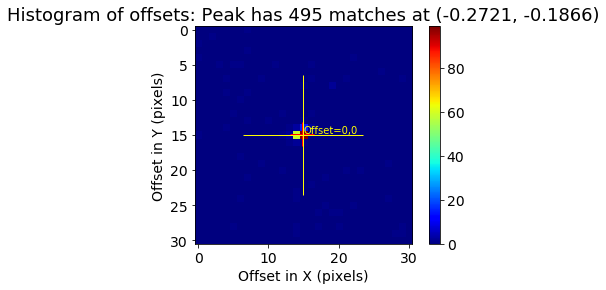

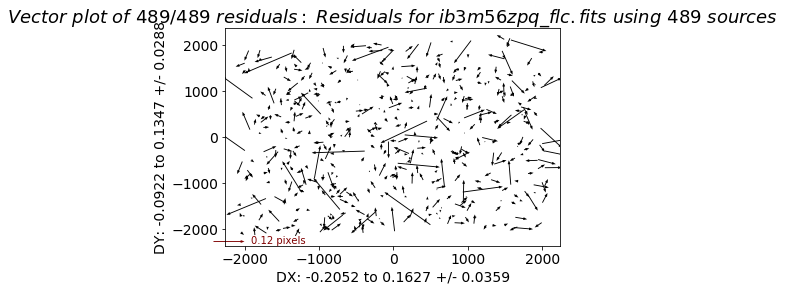

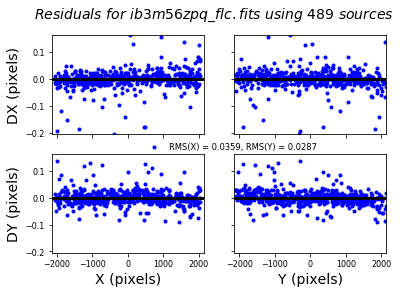

In [48]:
align_images(catalogs, searchrad=.6, gaia=True)
# Can also run with any arguments passed to TweakReg
# align_images(catalogs, searchrad=.6, gaia=True, fluxcol=5, maxflux=-14., minflux=-10., fluxunits='mag')

#### Can look at shift file, saved as shifts.txt

In [70]:
cat shifts.txt

# frame: output
# refimage: shifts_wcs.fits[wcs]
# form: delta
# units: pixels
ib2j01uyq_flc.fits    -0.026678  0.027841    0.000035     0.999999   0.024610  0.025469
ib3m56znq_flc.fits    0.025583  -0.020406    359.999793     1.000003   0.040253  0.029408
ib3m56zpq_flc.fits    0.008576  -0.011891    359.999940     0.999999   0.035898  0.028741


### See options for final collation of the table

In [12]:
# make_final_table?

In [75]:
tbl_i = make_final_table(input_images, min_detections=2)

The output WCS is the following: 
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 290.22106988007459  37.775312009363404  
CRPIX : 2064.0  2192.5  
CD1_1 CD1_2  : -9.2305468283659352e-06  -5.9932681943343301e-06  
CD2_1 CD2_2  : -5.9932681943343301e-06  9.2305468283659352e-06  
NAXIS : 4128  4385
Computing image coverage map.

Matching stars from input images with peaks in peakmap
N matched: 752
N matched: 717
N matched: 752
N matched: 717

Final step: collating properties of matched stars
(4, 1469)
Clipping the fit quality
Rejected 0 measurements
Performing zeropoint normalization


/Users/vbajaj/anaconda2/envs/astroconda/lib/python2.7/site-packages/astropy/stats/sigma_clipping.py:158: RuntimeWarning: invalid value encountered in greater
  _filtered_data.mask |= _filtered_data > max_value
/Users/vbajaj/anaconda2/envs/astroconda/lib/python2.7/site-packages/astropy/stats/sigma_clipping.py:159: RuntimeWarning: invalid value encountered in less
  _filtered_data.mask |= _filtered_data < min_value


In [76]:
tbl_i

mbar,rbar,dbar,qbar,xbar,ybar,mstd,rstd,dstd,qstd,xstd,ystd,n,n_expected
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
19.4676615176,290.261012927,37.7680203368,0.128,18.1936894717,74.9658967904,0.0205,2.16844568968e-08,1.881179017e-07,0.035,0.0079954776528,0.0151877849028,2,2
16.2726615176,290.256042003,37.7740572008,0.0195,19.1940231813,729.454338074,0.0085,5.32302522061e-08,3.86311675982e-08,0.0005,0.00129683190369,0.00502545546556,2,2
18.5251615176,290.252470222,37.7783308742,0.0665,23.0424856656,1194.8370307,0.005,5.09527922077e-08,8.85129303185e-08,0.0115,0.00130768646784,0.00873860444517,2,2
19.6776615176,290.253442494,37.7771128425,0.7695,24.7030044259,1063.98694591,0.0375,5.77369576149e-07,1.65635514549e-06,0.0465,0.1167004523,0.103687904467,2,2
18.3531615176,290.252501376,37.7782389818,0.0665,25.7101426863,1186.61474741,0.016,1.16759395041e-07,1.00095896016e-08,0.0085,0.00752948197396,0.00380103141856,2,2
14.7211615176,290.26054966,37.7684160081,0.019,26.5442567845,123.236389603,0.003,1.18972423025e-08,7.55413118725e-08,0.0,0.00445235399093,0.00529341735887,2,2
13.6281615176,290.257895227,37.7716511796,0.022,26.5127880339,473.608627484,0.004,4.93969594118e-08,5.84638115697e-09,0.002,0.0026873062119,0.00237653892816,2,2
17.4916615176,290.260565696,37.7681095745,0.0435,40.7307843661,99.2503188802,0.0145,1.01515780671e-07,1.76310468447e-07,0.0045,0.00260112647049,0.0174082162177,2,2
18.9781615176,290.248204699,37.7831650102,0.082,40.9333710831,1730.04974756,0.024,3.03905380861e-08,2.38360875926e-07,0.007,0.0136198746067,0.0169806078089,2,2


### See the results!
The columns are mbar, rbar, dbar, qbar, xbar, and ybar which are mean magnitude (instrumental), RA, Dec, Q (fit quality), X position in the output frame, and Y position in the output frame.  The columns ending in 'std' are the standard deviations of the values.  The last column 'n' is the number of times that source was detected (and not clipped out from the averaging).

### To access a column from the table, the syntax is `tbl[<colname>]` as seen below

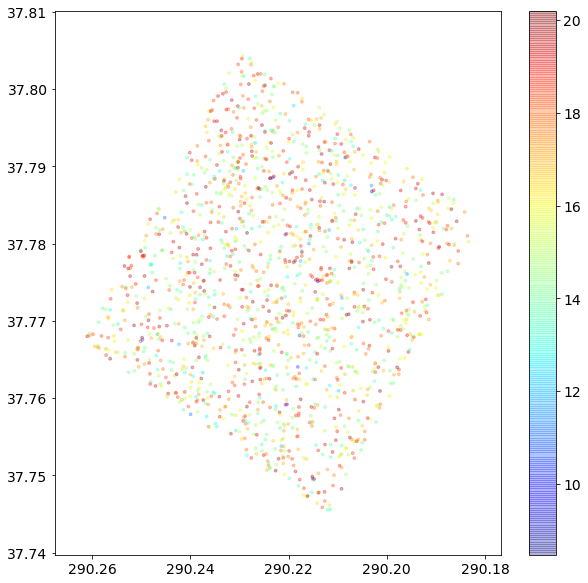

In [77]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl_i['rbar'], tbl_i['dbar'], c=tbl_i['mbar'], s = 8, alpha=.3)
plt.xlim(plt.xlim()[::-1]) # reverse x axis for RA
plt.colorbar()

(0, 0.1)

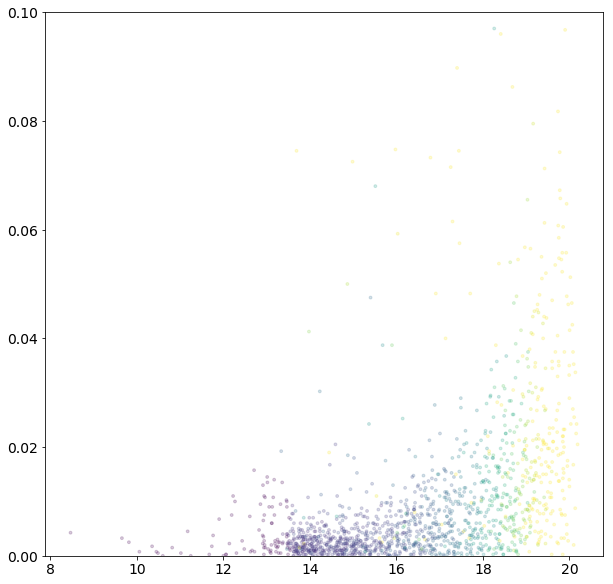

In [83]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl_i['mbar'], tbl_i['mstd'], c=tbl_i['qbar'], s = 8, alpha=.2, vmin=0., vmax=.1, cmap='viridis')
plt.ylim(0,.1)

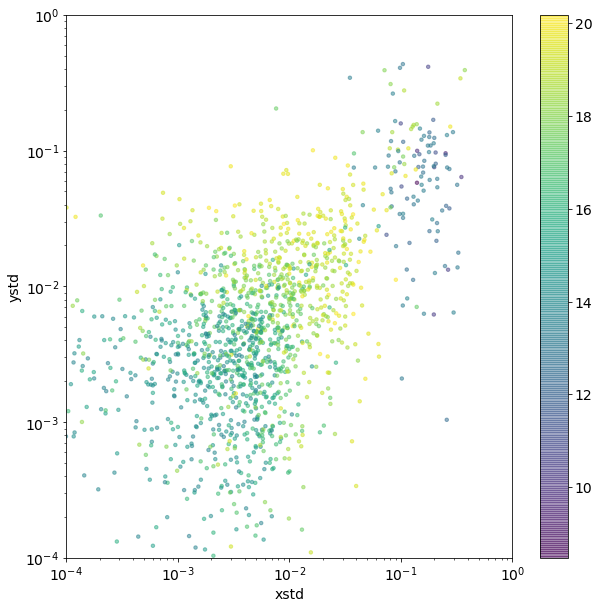

In [85]:
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl_i['xstd'], tbl_i['ystd'], s = 12, alpha=.5, c=tbl_i['mbar'], cmap='viridis')
plt.xlim(0.0001, 1)
plt.ylim(0.0001, 1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('xstd')
plt.ylabel('ystd')
plt.colorbar()

(12, 21)

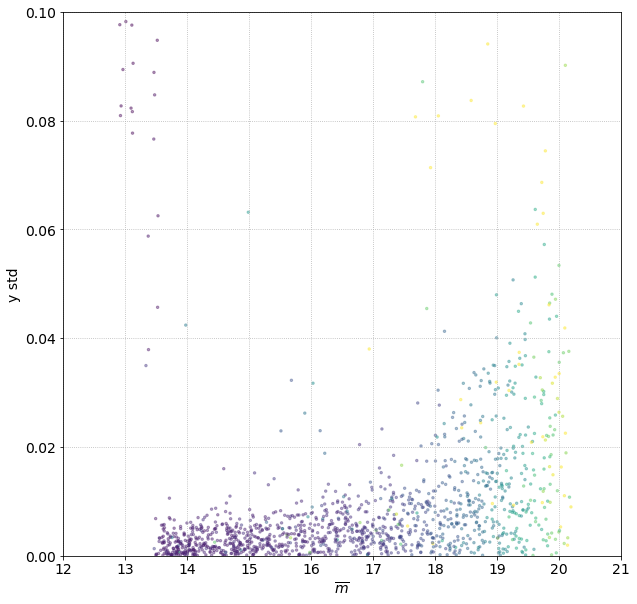

In [103]:
# stat, bedges, bn = binned_statistic(tbl['mbar'], tbl['xstd'],statistic=np.nanmedian, bins=20)
fig = plt.figure(figsize=(10,10))
plt.scatter(tbl_i['mbar'], tbl_i['xstd'], s = 6, alpha=.4, c=tbl_i['qbar'], vmin=0, vmax=.2, cmap='viridis')

plt.xlabel('$\overline{m}$')
plt.ylabel('y std')
plt.grid(ls=':')
plt.ylim(-.0,.1)
plt.xlim(12, 21)

### Tables can be matched as well:

In [86]:
from psf_tools.MatchUtils import match_final_catalogs

In [87]:
gaia_tbl = Table.read('gaia.cat', format='ascii.commented_header')
gaia_tbl['ra'].name = 'rbar'
gaia_tbl['dec'].name = 'dbar'
matched_i, matched_gaia = match_final_catalogs(tbl_i, gaia_tbl, max_distance=.04)

Text(0.5,0,'mbar')

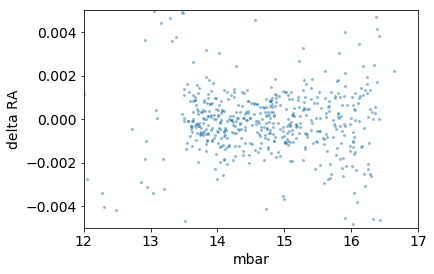

In [97]:
plt.scatter(matched_i['mbar'], (matched_i['rbar'] - matched_gaia['rbar'])*3600., s=4, alpha=.4)
plt.xlim(12., 17.)
plt.ylim(-.005, .005)
plt.ylabel('delta RA')
plt.xlabel('mbar')

Text(0.5,0,'mbar')

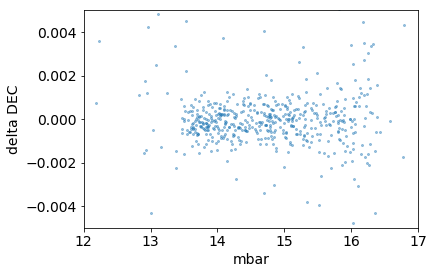

In [98]:
plt.scatter(matched_i['mbar'], (matched_i['dbar'] - matched_gaia['dbar'])*3600., s=4, alpha=.4)
plt.xlim(12., 17.)
plt.ylim(-.005, .005)
plt.ylabel('delta DEC')
plt.xlabel('mbar')